# **Online Shoppers Purchasing Intention**

**Data Scientist Team 6 - Majestic** :
- Faiz Naida
- Fajar Arief
- Melani Hariono
- Refi Fadholi
- Riswan Setiawan
- Shanna Sinaga
- Tegar Theo

---

# **STAGE 1 - EDA (Exploratory Data Analysis)**

# **0. Load Dataset**
---

In [1]:
# mengimpor library

import pandas as pd 
import numpy as np                     #untuk kalkulasi mathematic
import seaborn as sns                  #Untuk visualisasi data
import matplotlib.pyplot as plt        #Untuk plotting graphs 
from matplotlib import rcParams
%matplotlib inline
import warnings                
#Untuk mengabaikan peringatan
warnings.filterwarnings("ignore")

In [2]:
# read dataset
url = 'https://drive.google.com/file/d/1UJ07j4gSGHTDpw53wO3L2y4eoXesZbMN/view?usp=sharing'
file_id = url.split('/')[-2]
dwn_url = 'https://drive.google.com/uc?id=' + file_id

df = pd.read_csv(dwn_url)

# **1. Descriptive Statistics**
---

### **A ) Tipe Data**

In [3]:
# melihat info tipe dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [4]:
# melihat jumlah rows dan feature
df.shape

(12330, 18)

Dari informasi diatas dataset tidak ada missing value dengan dengan jumlah record 12330 denag 18 fitur

### **B ) Missing Value**

In [5]:
# melihat jumlah nilai null atau missing value
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Tidak ada missing value.

### **C ) Data Duplikat**

In [6]:
# cek duplikat
df.duplicated().any()

True

In [7]:
df.duplicated().sum()

125

Terdapat 125 record yang di duplikat.

### **D ) Unique Value**

In [8]:
# melihat nilai unique disetiap feature
for col in df.columns:
    print('{} mempunyai {} nilai unique : {}'.format(col, df[col].nunique(), df[col].dtypes))
    if df[col].dtypes == 'int64' or df[col].dtypes == 'float64' or df[col].dtypes == 'bool' or df[col].dtypes == 'object':
        print('{} nilai : {}'.format(col,df[col].unique()))

Administrative mempunyai 27 nilai unique : int64
Administrative nilai : [ 0  1  2  4 12  3 10  6  5  9  8 16 13 11  7 18 14 17 19 15 24 22 21 20
 23 27 26]
Administrative_Duration mempunyai 3335 nilai unique : float64
Administrative_Duration nilai : [  0.         53.         64.6       ... 167.9107143 305.125
 150.3571429]
Informational mempunyai 17 nilai unique : int64
Informational nilai : [ 0  1  2  4 16  5  3 14  6 12  7  9 10  8 11 24 13]
Informational_Duration mempunyai 1258 nilai unique : float64
Informational_Duration nilai : [  0.   120.    16.   ... 547.75 368.25 211.25]
ProductRelated mempunyai 311 nilai unique : int64
ProductRelated nilai : [  1   2  10  19   0   3  16   7   6  23  13  20   8   5  32   4  45  14
  52   9  46  15  22  11  12  36  42  27  90  18  38  17 128  25  30  21
  51  26  28  31  24  50  96  49  68  98  67  55  35  37  29  34  71  63
  87  40  33  54  64  75  39 111  81  61  47  44  88 149  41  79  66  43
 258  80  62  83 173  48  58  57  56  69  82  5

- Terdapat **2 bulan** yang **hilang** yaitu **Januari** dan **April**.
- Nilai **Other** pada **VisitorType**.
- Fitur kategorikal seperti OperatingSystems, Browser, Region, TrafficTipe telah dilakukan encoding.

### **E ) Statistical Summary**

In [9]:
# melihat deskriptif statistik feature numerik
df.describe().T

count         mean          std  min         25%  \
Administrative           12330.0     2.315166     3.321784  0.0    0.000000   
Administrative_Duration  12330.0    80.818611   176.779107  0.0    0.000000   
Informational            12330.0     0.503569     1.270156  0.0    0.000000   
Informational_Duration   12330.0    34.472398   140.749294  0.0    0.000000   
ProductRelated           12330.0    31.731468    44.475503  0.0    7.000000   
ProductRelated_Duration  12330.0  1194.746220  1913.669288  0.0  184.137500   
BounceRates              12330.0     0.022191     0.048488  0.0    0.000000   
ExitRates                12330.0     0.043073     0.048597  0.0    0.014286   
PageValues               12330.0     5.889258    18.568437  0.0    0.000000   
SpecialDay               12330.0     0.061427     0.198917  0.0    0.000000   
OperatingSystems         12330.0     2.124006     0.911325  1.0    2.000000   
Browser                  12330.0     2.357097     1.717277  1.0    2.000000   
Region                   12330.0     3.147364     2.401591  1.0    1.000000   
TrafficType              12330.0     4.069586     4.025169  1.0    2.000000   

                                50%          75%           max  
Administrative             1.000000     4.000000     27.000000  
Administrative_Duration    7.500000    93.256250   3398.750000  
Informational              0.000000     0.000000     24.000000  
Informational_Duration     0.000000     0.000000   2549.375000  
ProductRelated            18.000000    38.000000    705.000000  
ProductRelated_Duration  598.936905  1464.157214  63973.522230  
BounceRates                0.003112     0.016813      0.200000  
ExitRates                  0.025156     0.050000      0.200000  
PageValues                 0.000000     0.000000    361.763742  
SpecialDay                 0.000000     0.000000      1.000000  
OperatingSystems           2.000000     3.000000      8.000000  
Browser                    2.000000     2.000000     13.000000  
Region                     3.000000     4.000000      9.000000  
TrafficType                2.000000     4.000000     20.000000

- Mayoritas dataset memiliki angka **Mean < Median**, artinya distribusi data cenderung positively-skewed.
- Pada fitur yang menunjukkan **traffic website** seperti 'Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', dan 'PageValues mayoritas memiliki **nilai yang menumpuk di angka 0**.

In [10]:
# melihat deskriptif statistik kolom kategorik
df_cat1 = df.select_dtypes(['object','bool']).describe().T
df_cat1['% freq'] = (df_cat1['freq']/df_cat1['count']*100)
df_cat1

count unique                top   freq     % freq
Month        12330     10                May   3364  27.283049
VisitorType  12330      3  Returning_Visitor  10551  85.571776
Weekend      12330      2              False   9462  76.739659
Revenue      12330      2              False  10422  84.525547

In [11]:
df_cat2 = df[['OperatingSystems', 'Browser', 'Region', 'TrafficType']].astype('object').describe().T
df_cat2['% freq'] = (df_cat2['freq']/df_cat2['count']*100)
df_cat2

count  unique  top  freq     % freq
OperatingSystems  12330       8    2  6601  53.536091
Browser           12330      13    2  7961  64.566099
Region            12330       9    1  4780  38.767234
TrafficType       12330      20    2  3913  31.735604

- Jumlah pengunjung web tertinggi ada pada bulan **Mei**.
- Mayoritas, **85%** pelanggan adalah **Returning Visitor**.
- Sebanyak **84%** pengunjung website **tidak purchase**.
- Mayoritas pelanggan berasal dari **Region 1** dan berselancar di website menggunakan **OperatingSystems, Browser, TraficType jenis 2**.

### **F ) Deskripsi Feature Target**

In [12]:
# melihat nilai revenue yang True dan False
revenue_col = df['Revenue'].value_counts().reset_index()
revenue_col.columns = ['Revenue', 'count']
revenue_col['%'] = (revenue_col['count']/revenue_col['count'].sum()*100).round(2)
revenue_col

Revenue  count      %
0    False  10422  84.53
1     True   1908  15.47

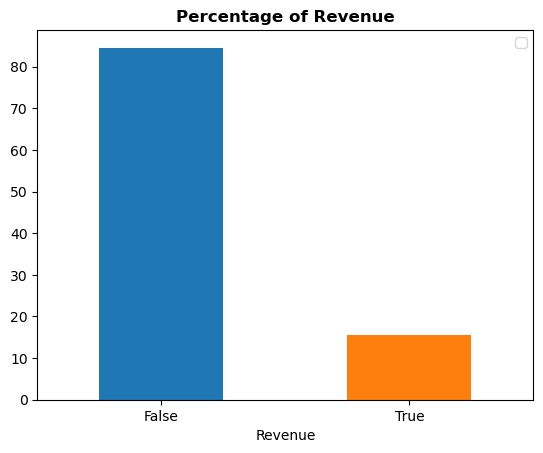

In [13]:
# creating visualization
x = revenue_col.plot(kind='bar', x='Revenue', y='%', color=sns.color_palette('tab10'))
plt.title('Percentage of Revenue', fontweight='bold')
plt.xticks(rotation=360)
plt.legend('')

# **2. Univariate Analysis**
---

### **A ) Pengelompokan Tipe Data**

In [14]:
# kategorikal data
cats = df.loc[:, (df.dtypes == 'object') | (df.dtypes == 'bool')].columns.tolist()
print(cats)
print('Counts :', len(cats))

['Month', 'VisitorType', 'Weekend', 'Revenue']
Counts : 4


In [15]:
# data numerik
nums = df.loc[:, (df.dtypes == 'int64') | (df.dtypes == float)].columns.tolist()
print(nums)
print('Counts :', len(nums))

['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']
Counts : 14


In [16]:
# Split data set
nums = nums.copy()
cats = cats.copy()

### **B ) Feature Numerikal**

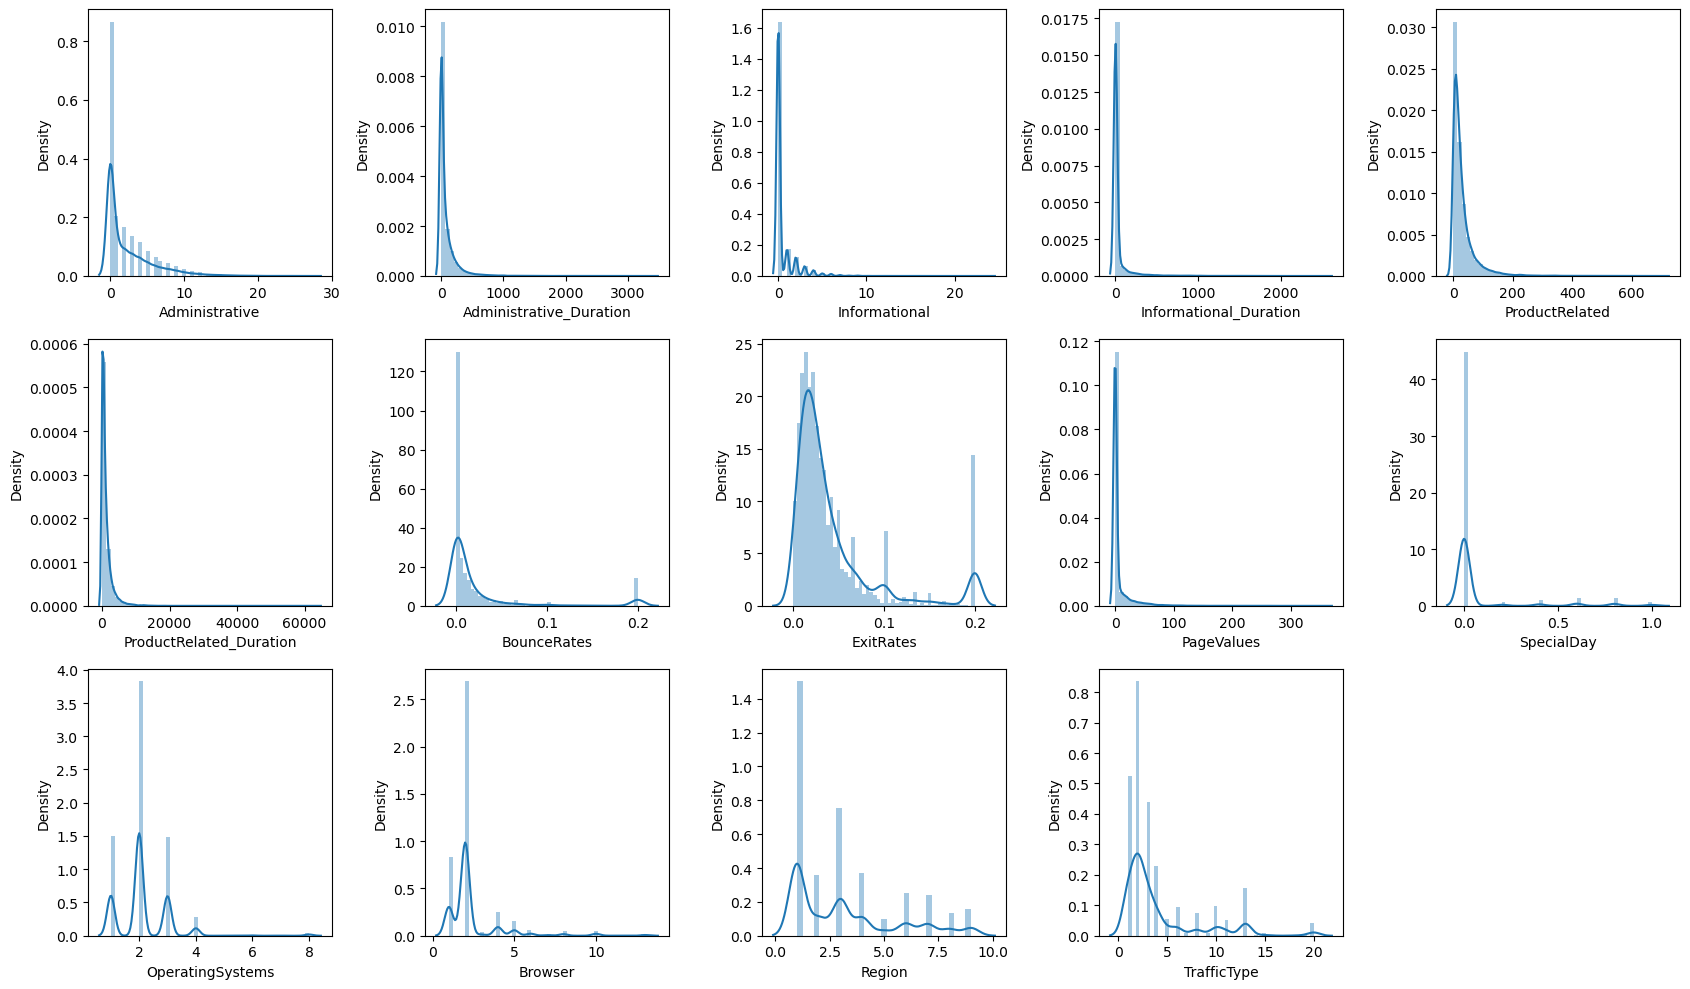

In [17]:
# cek distribusi dan skewness dengan displot
plt.figure(figsize=(17, 10))
for i in range(0, len(nums)):
    plt.subplot(3, 5, i+1)
    sns.distplot(df[nums[i]])
    plt.tight_layout()

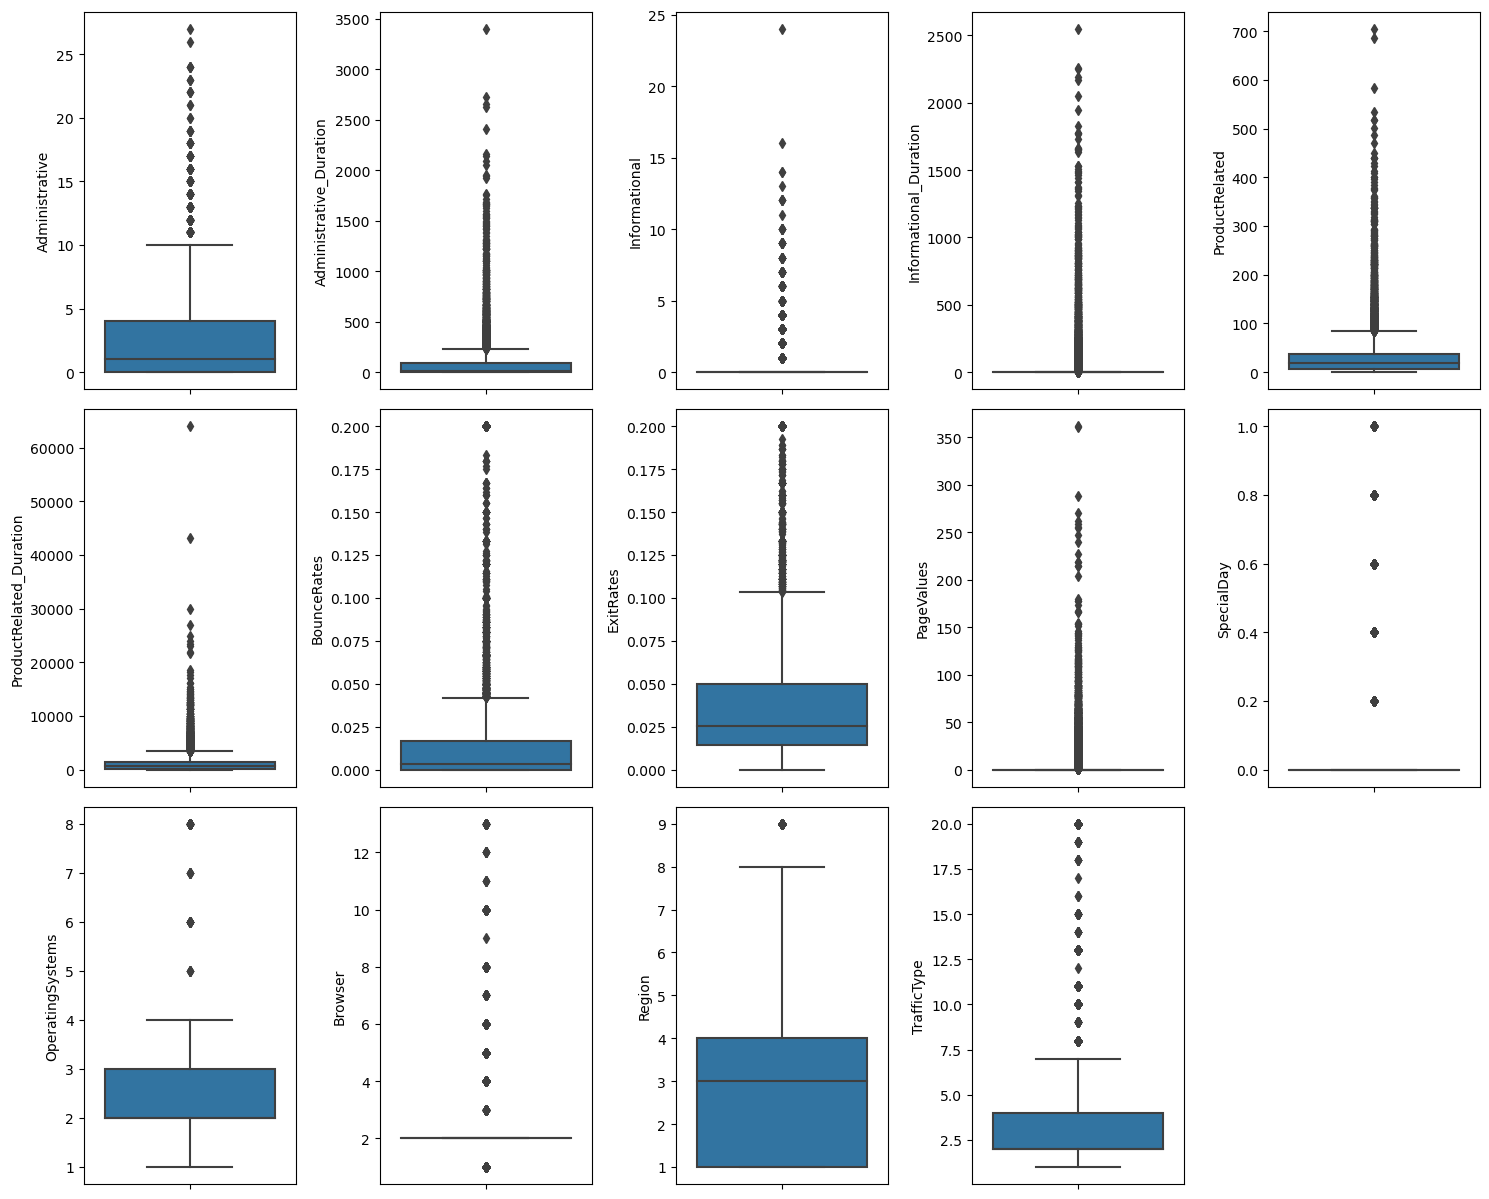

In [18]:
# cek distribusi dan outlier menggunakan boxplot
plt.figure(figsize=(15, 20))
for i in range(0, len(nums)):
    plt.subplot(5, 5, i+1)
    sns.boxplot(y=df[nums[i]], orient='v')
    plt.tight_layout()

Distribusi data cenderung **long-taliled povitively-skewed**, sehingga cenderung memiliki nilai **outlier** pada analisis menggunakan boxplot.

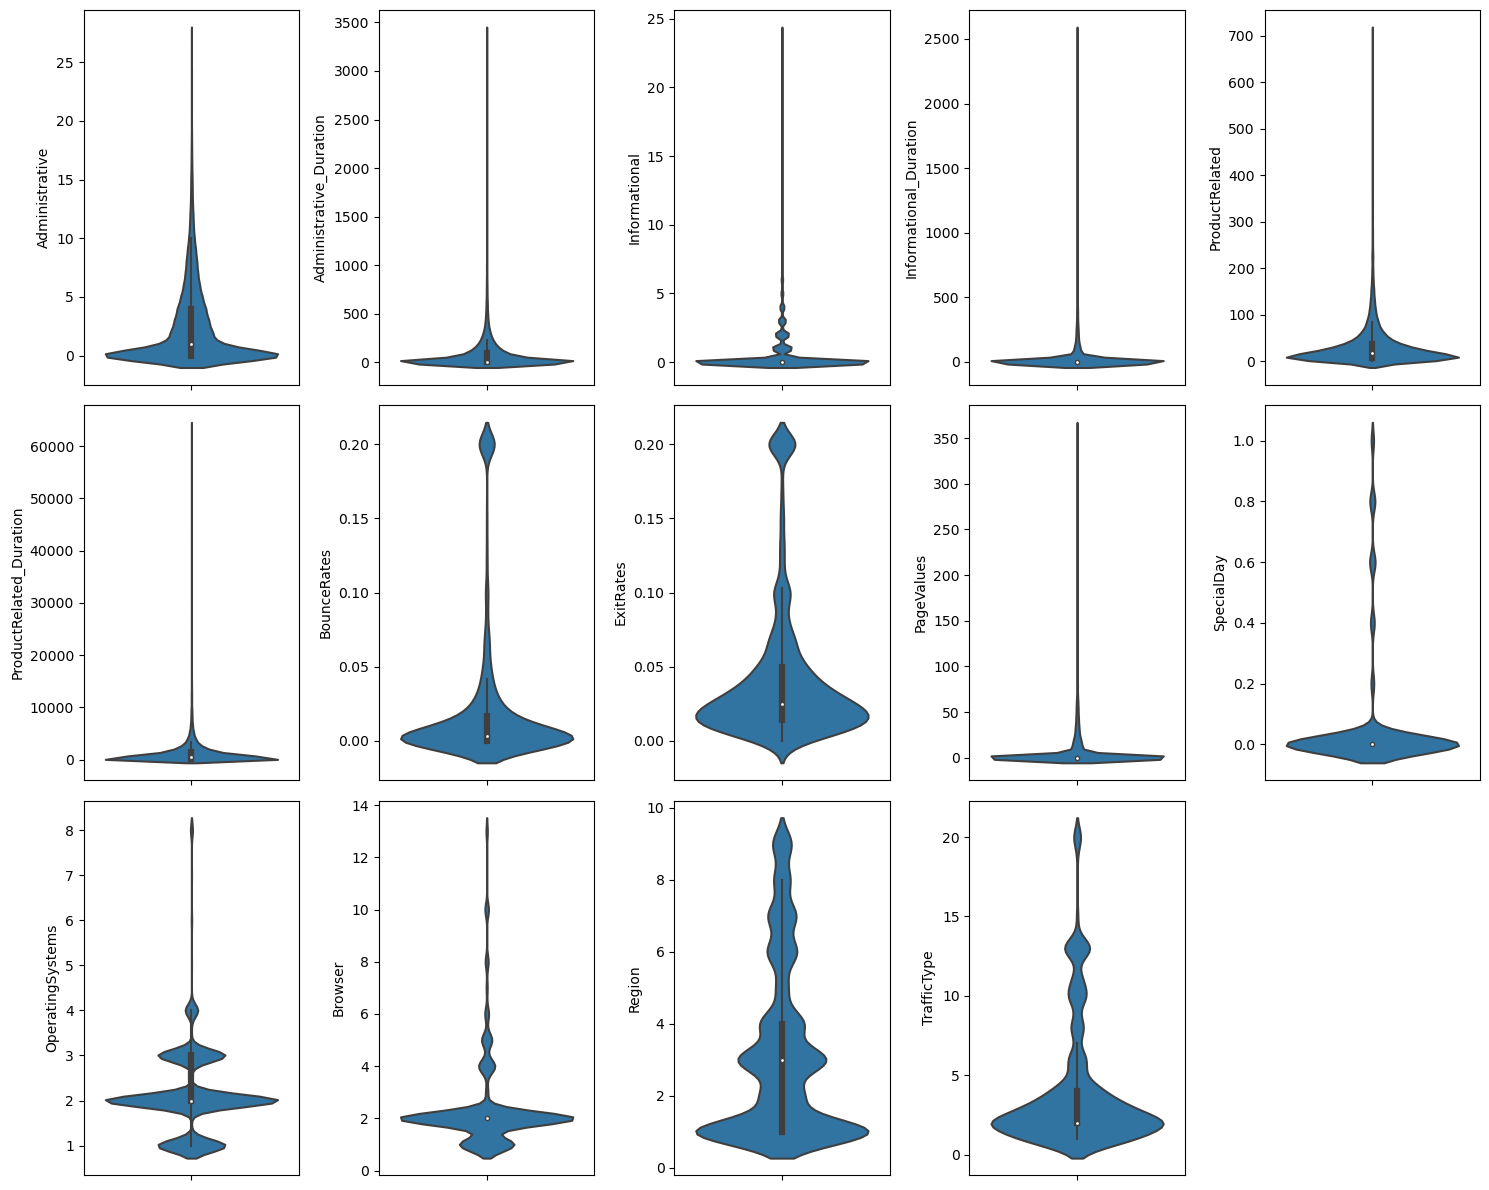

In [19]:
# cek distribusi dengan violinplot
plt.figure(figsize=(15, 12))
for i in range(0, len(nums)):
    plt.subplot(3, 5, i+1)
    sns.violinplot(y = df[nums[i]], orient='v')
    plt.tight_layout()

Distribusi yang memiliki data yang menumpuk ekstrim di nilai 0 diantaranya : Administrative, Administrative_Duration, Informational, Informational_Duration, ProductRelated, ProductRelated_Duration, PageValues, SpecialDay.

### **C ) Feature Kategorikal**

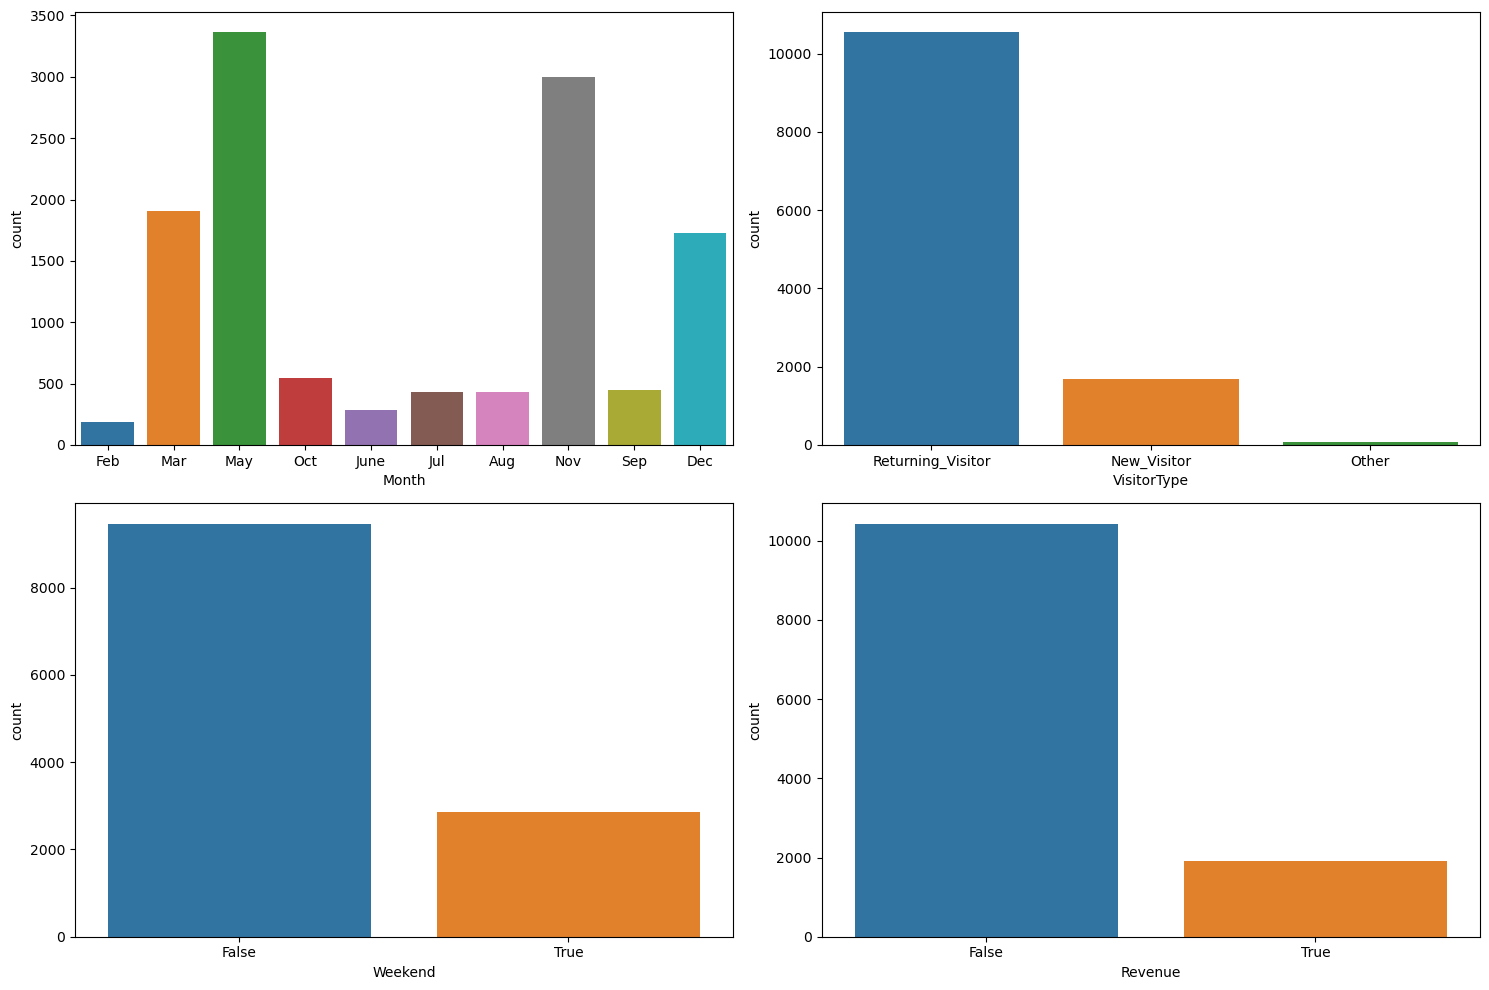

In [20]:
#countplot untuk data categorical
plt.figure(figsize=(15, 10))
features = cats
for i in range(0, len(features)):
  plt.subplot(2, 2, i+1)
  sns.countplot(x=df[features[i]], orient='v')
  plt.tight_layout()

# **3. Multivariate Analysis**
---

In [23]:
# Bedakan numerikal dan kategorikal
nums = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
       'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Revenue']
cats = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Month', 'Revenue']

### **A ) Hubungan Antar Kolom Numerikal**

In [25]:
# numerikal dengan target
nums_dan_revenue = df[nums]
nums_dan_revenue['Revenue'] = df['Revenue']
nums_dan_revenue.T

0      1      2         3      4           5      \
Administrative               0      0      0         0      0           0   
Administrative_Duration    0.0    0.0    0.0       0.0    0.0         0.0   
Informational                0      0      0         0      0           0   
Informational_Duration     0.0    0.0    0.0       0.0    0.0         0.0   
ProductRelated               1      2      1         2     10          19   
ProductRelated_Duration    0.0   64.0    0.0  2.666667  627.5  154.216667   
BounceRates                0.2    0.0    0.2      0.05   0.02    0.015789   
ExitRates                  0.2    0.1    0.2      0.14   0.05    0.024561   
PageValues                 0.0    0.0    0.0       0.0    0.0         0.0   
SpecialDay                 0.0    0.0    0.0       0.0    0.0         0.0   
Revenue                  False  False  False     False  False       False   

                         6      7      8         9      ...       12320  \
Administrative               0      1      0         0  ...           0   
Administrative_Duration    0.0    0.0    0.0       0.0  ...         0.0   
Informational                0      0      0         0  ...           0   
Informational_Duration     0.0    0.0    0.0       0.0  ...         0.0   
ProductRelated               1      0      2         3  ...           8   
ProductRelated_Duration    0.0    0.0   37.0     738.0  ...  143.583333   
BounceRates                0.2    0.2    0.0       0.0  ...    0.014286   
ExitRates                  0.2    0.2    0.1  0.022222  ...        0.05   
PageValues                 0.0    0.0    0.0       0.0  ...         0.0   
SpecialDay                 0.4    0.0    0.8       0.4  ...         0.0   
Revenue                  False  False  False     False  ...       False   

                         12321     12322       12323     12324        12325  \
Administrative               0         6           2         0            3   
Administrative_Duration    0.0     76.25       64.75       0.0        145.0   
Informational                0         0           0         1            0   
Informational_Duration     0.0       0.0         0.0       0.0          0.0   
ProductRelated               6        22          44        16           53   
ProductRelated_Duration    0.0   1075.25  1157.97619     503.0  1783.791667   
BounceRates                0.2       0.0         0.0       0.0     0.007143   
ExitRates                  0.2  0.004167    0.013953  0.037647     0.029031   
PageValues                 0.0       0.0         0.0       0.0    12.241717   
SpecialDay                 0.0       0.0         0.0       0.0          0.0   
Revenue                  False     False       False     False        False   

                            12326     12327     12328     12329  
Administrative                  0         0         4         0  
Administrative_Duration       0.0       0.0      75.0       0.0  
Informational                   0         0         0         0  
Informational_Duration        0.0       0.0       0.0       0.0  
ProductRelated                  5         6        15         3  
ProductRelated_Duration    465.75    184.25     346.0     21.25  
BounceRates                   0.0  0.083333       0.0       0.0  
ExitRates                0.021333  0.086667  0.021053  0.066667  
PageValues                    0.0       0.0       0.0       0.0  
SpecialDay                    0.0       0.0       0.0       0.0  
Revenue                     False     False     False     False  

[11 rows x 12330 columns]

<Figure size 2000x2000 with 0 Axes>

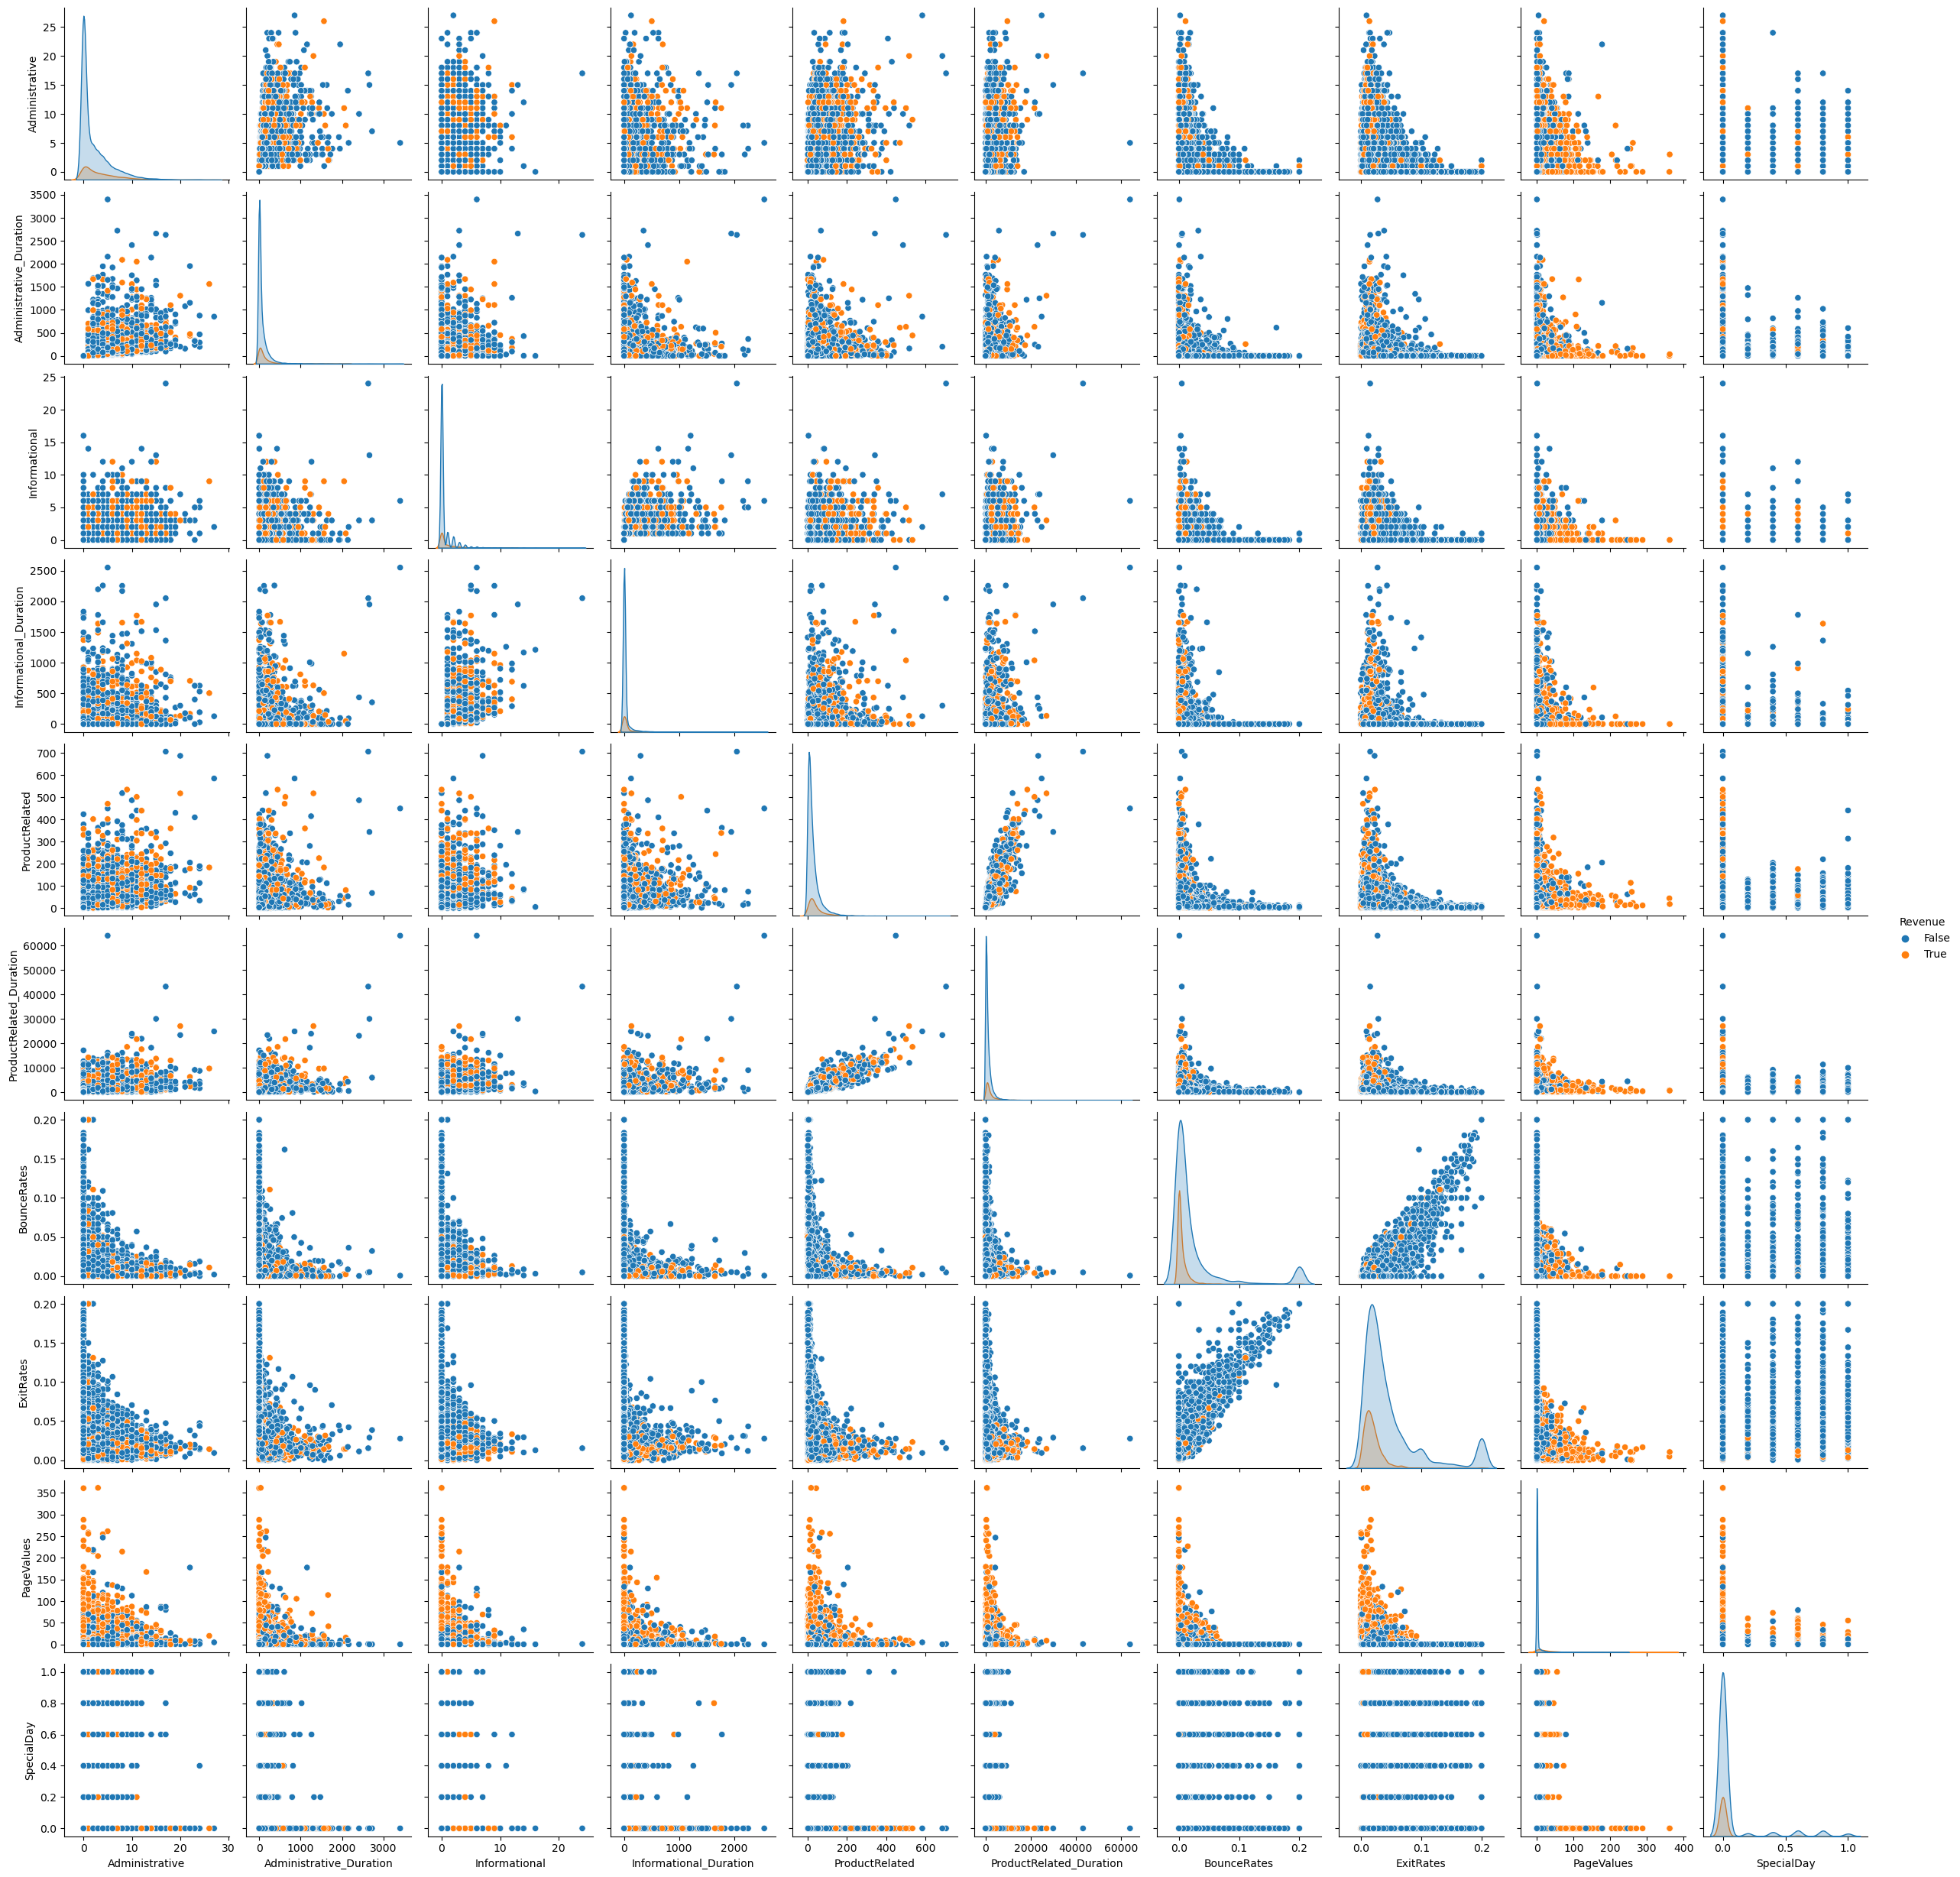

In [26]:
plt.figure(figsize = (20,20))
sns.pairplot(nums_dan_revenue, hue = 'Revenue')

<AxesSubplot: >

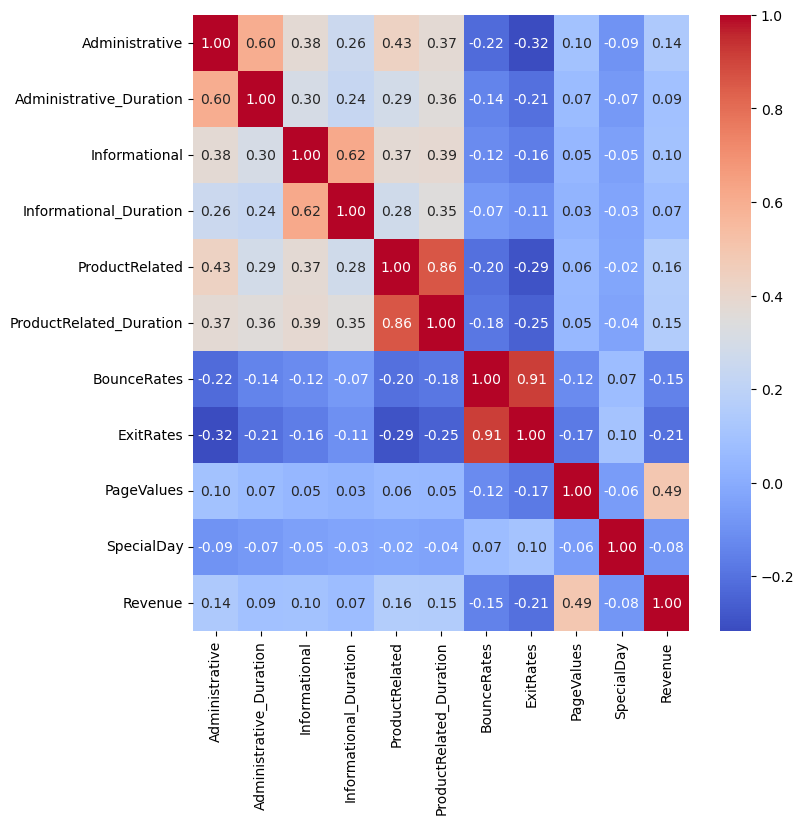

In [27]:
# analisi menggunakan heatmap
plt.figure(figsize = (8,8))
sns.heatmap(df[nums].corr(), cmap = 'coolwarm', annot = True, fmt = '.2f')

- Fitur **ExitRates** dan **BounceRates** memiliki nilai **multikolinieritas** yang tinggi (> 0.7), kedua kolom ini pun berhubungan satu sama lain sehingga dapat di drop salah satunya.
- Terdapat beberapa **fitur-fitur** yang kemungkinan **redundan** karena memiliki korelasi yang cukup tinggi diantaranya **ProductRelated dengan ProductRelated_Duration, Adminisitrative dengan Adminisitrative_Duration, Informational dengan Informational_Duration**, dan begitu pula **BounceRates dengan ExitRates**. Dalam tahap data prepocessing feature-feature tersebut dapat di drop ataupun dipilih salah satu.
- Kolom **PageValues** ternyata memiliki **korelasi tinggi** dengan **Revenue** (0.49)
- Kolom BounceRates dengan beberapa kolom lain, exitrates dengan beberapa kolom lain, dan page values dengan beberapa kolom lain berkumpul di bawah dan samping kiri cenderung membentuk pola logaritmik. Itu artinya, Apabila kolom BounceRates dan kolom Informational_Duration berhubungan secara logaritmik, semakin besar nilai BounceRates, nilai Informational_Duration semakin kecil secara logaritmik. 

### **B ) Hubungan Kolom Kategorikal dan Numerikal**

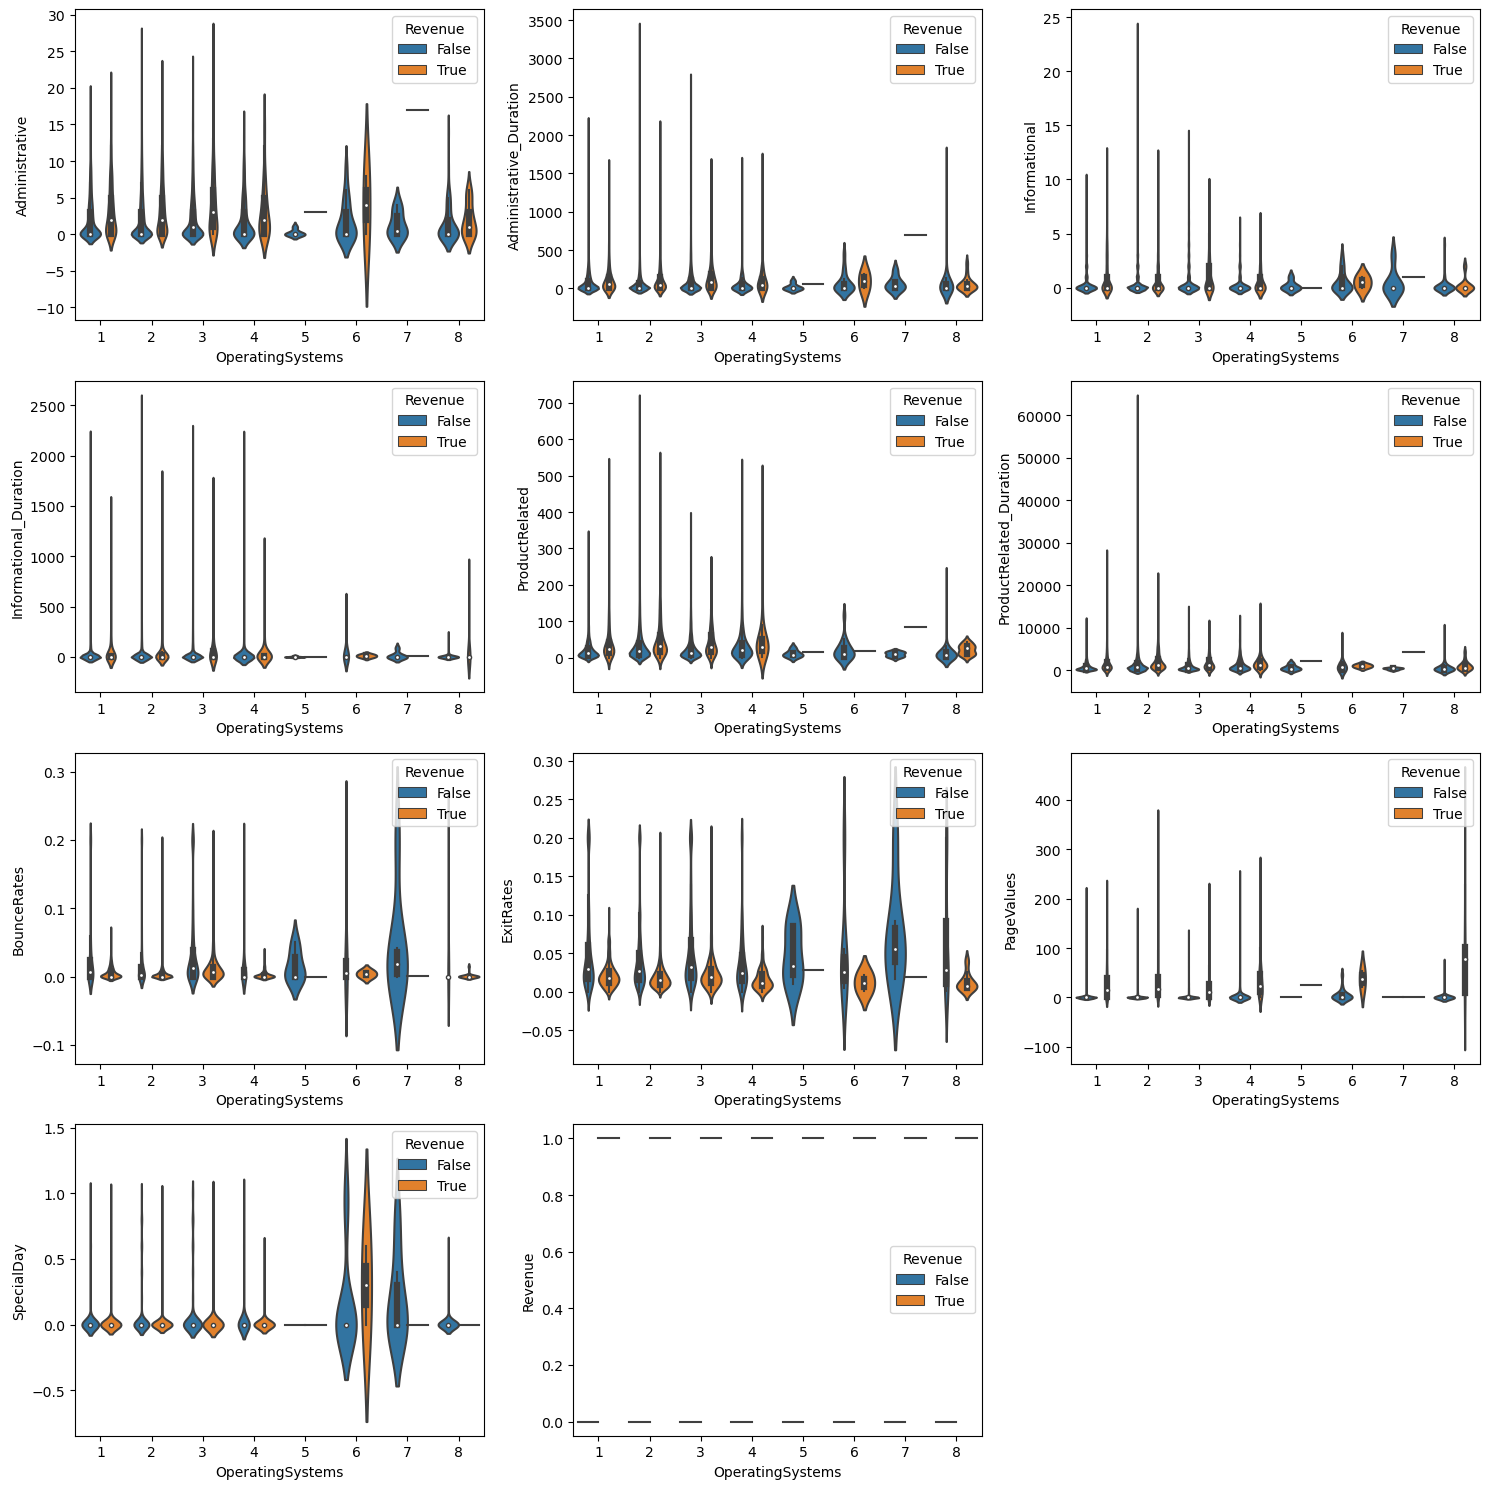

In [28]:
# Hubungan operating system dengan fitur numerikal
fig = plt.figure(figsize = (15,15))
for i in range(0, len(nums)): #untuk setiap kolom numerik
    ax = fig.add_subplot(4,3,i+1) #kita set posisi catplot/stripplotnya di layout
    sns.violinplot(ax = ax, data = df, x = 'OperatingSystems', y = nums[i], hue = 'Revenue') #gambar catplot/stripplotnya
    plt.tight_layout()

Sangat sedikit pelanggan menggunakan OperatingSystems jenis 5, 6, 7, 8, namun pada hungungan fitur BounceRates, ExiteRates, dan SepecialDay memiliki nilai yang lebih tinggi. Hal ini dikarenakan kolom tersebut memiliki korelasi negatif terhadap fitur lain. 

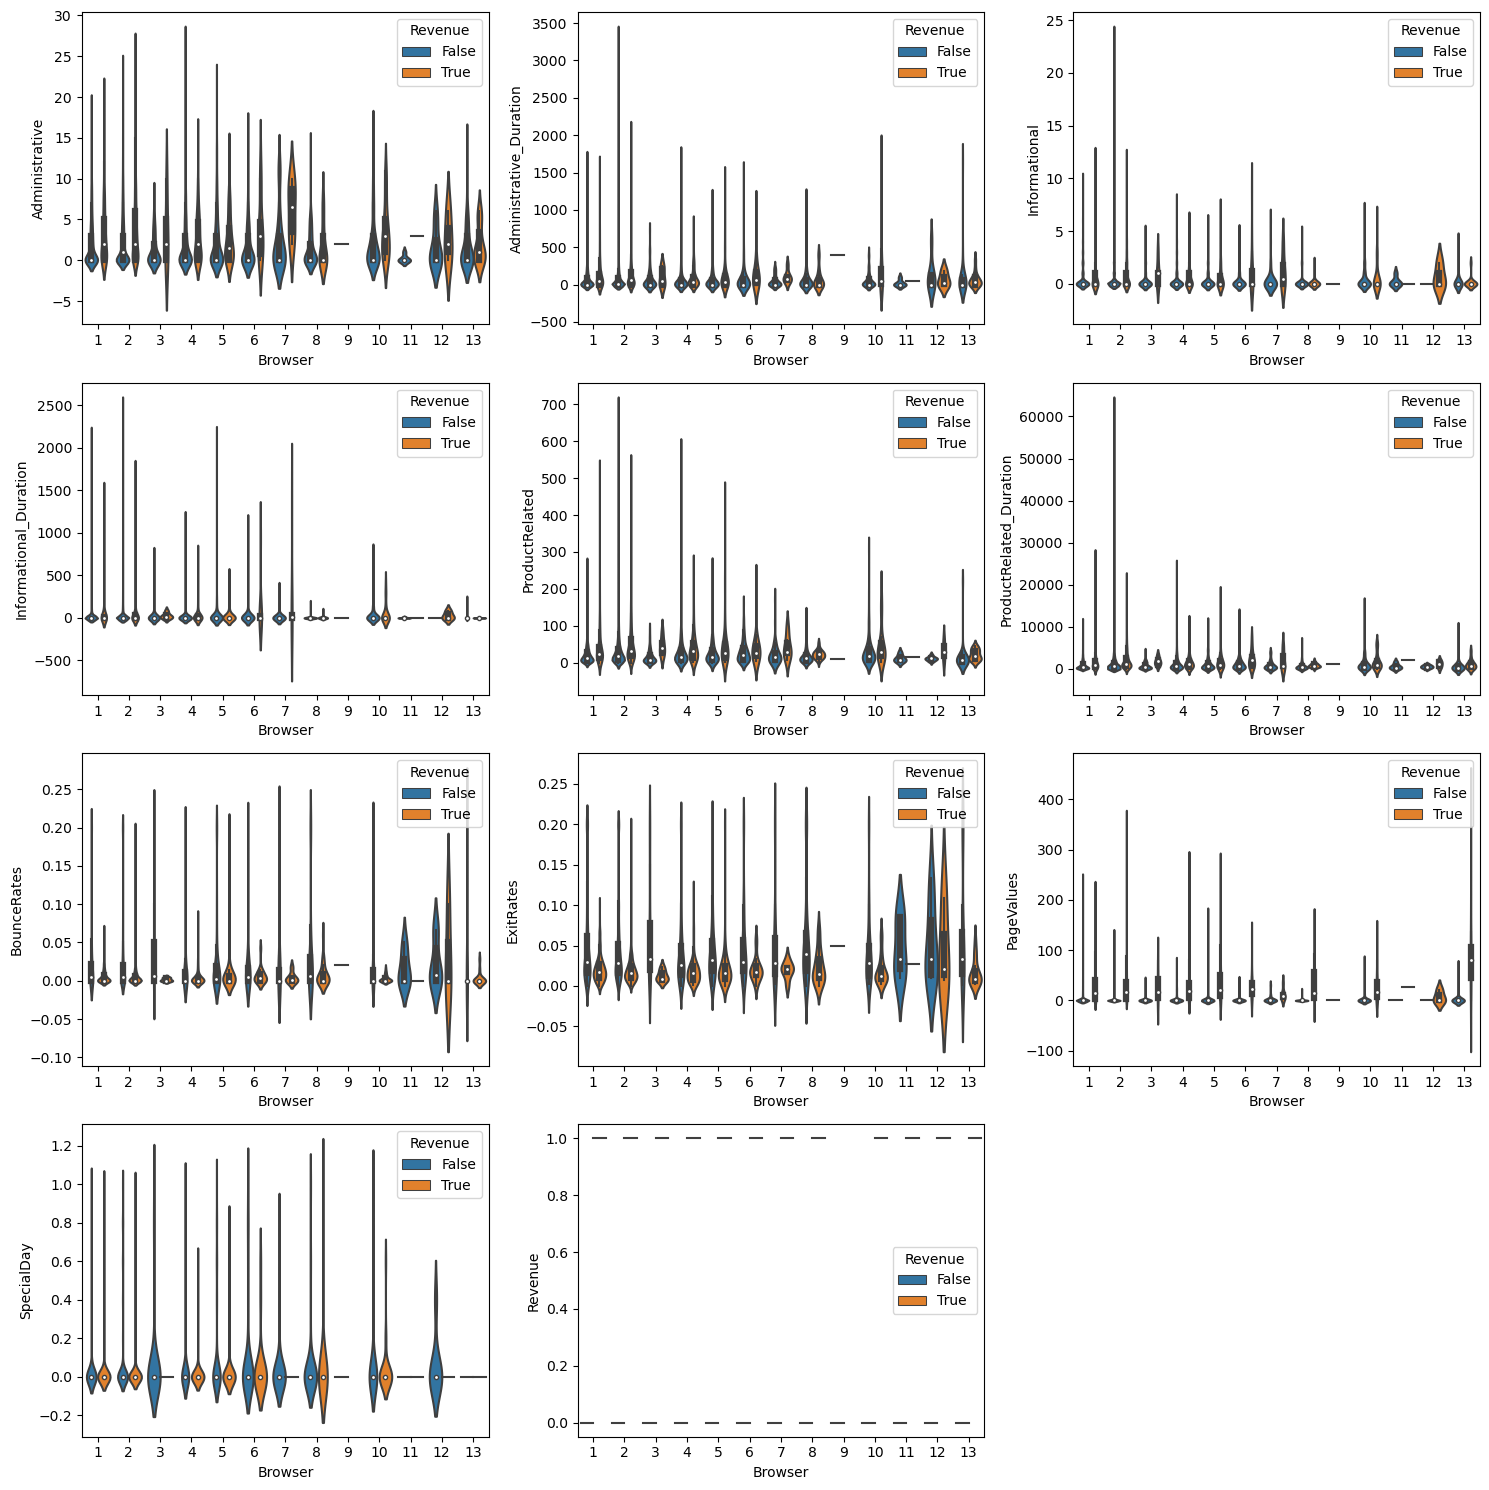

In [29]:
# Hubungan browser dengan fitur numerikal
fig = plt.figure(figsize = (15,15))
for i in range(0, len(nums)): #untuk setiap kolom numerik
    ax = fig.add_subplot(4,3,i+1) #kita set posisi catplot/stripplotnya di layout
    sns.violinplot(ax = ax, data = df, x = 'Browser', y = nums[i], hue = 'Revenue') #gambar catplot/stripplotnya
    plt.tight_layout()

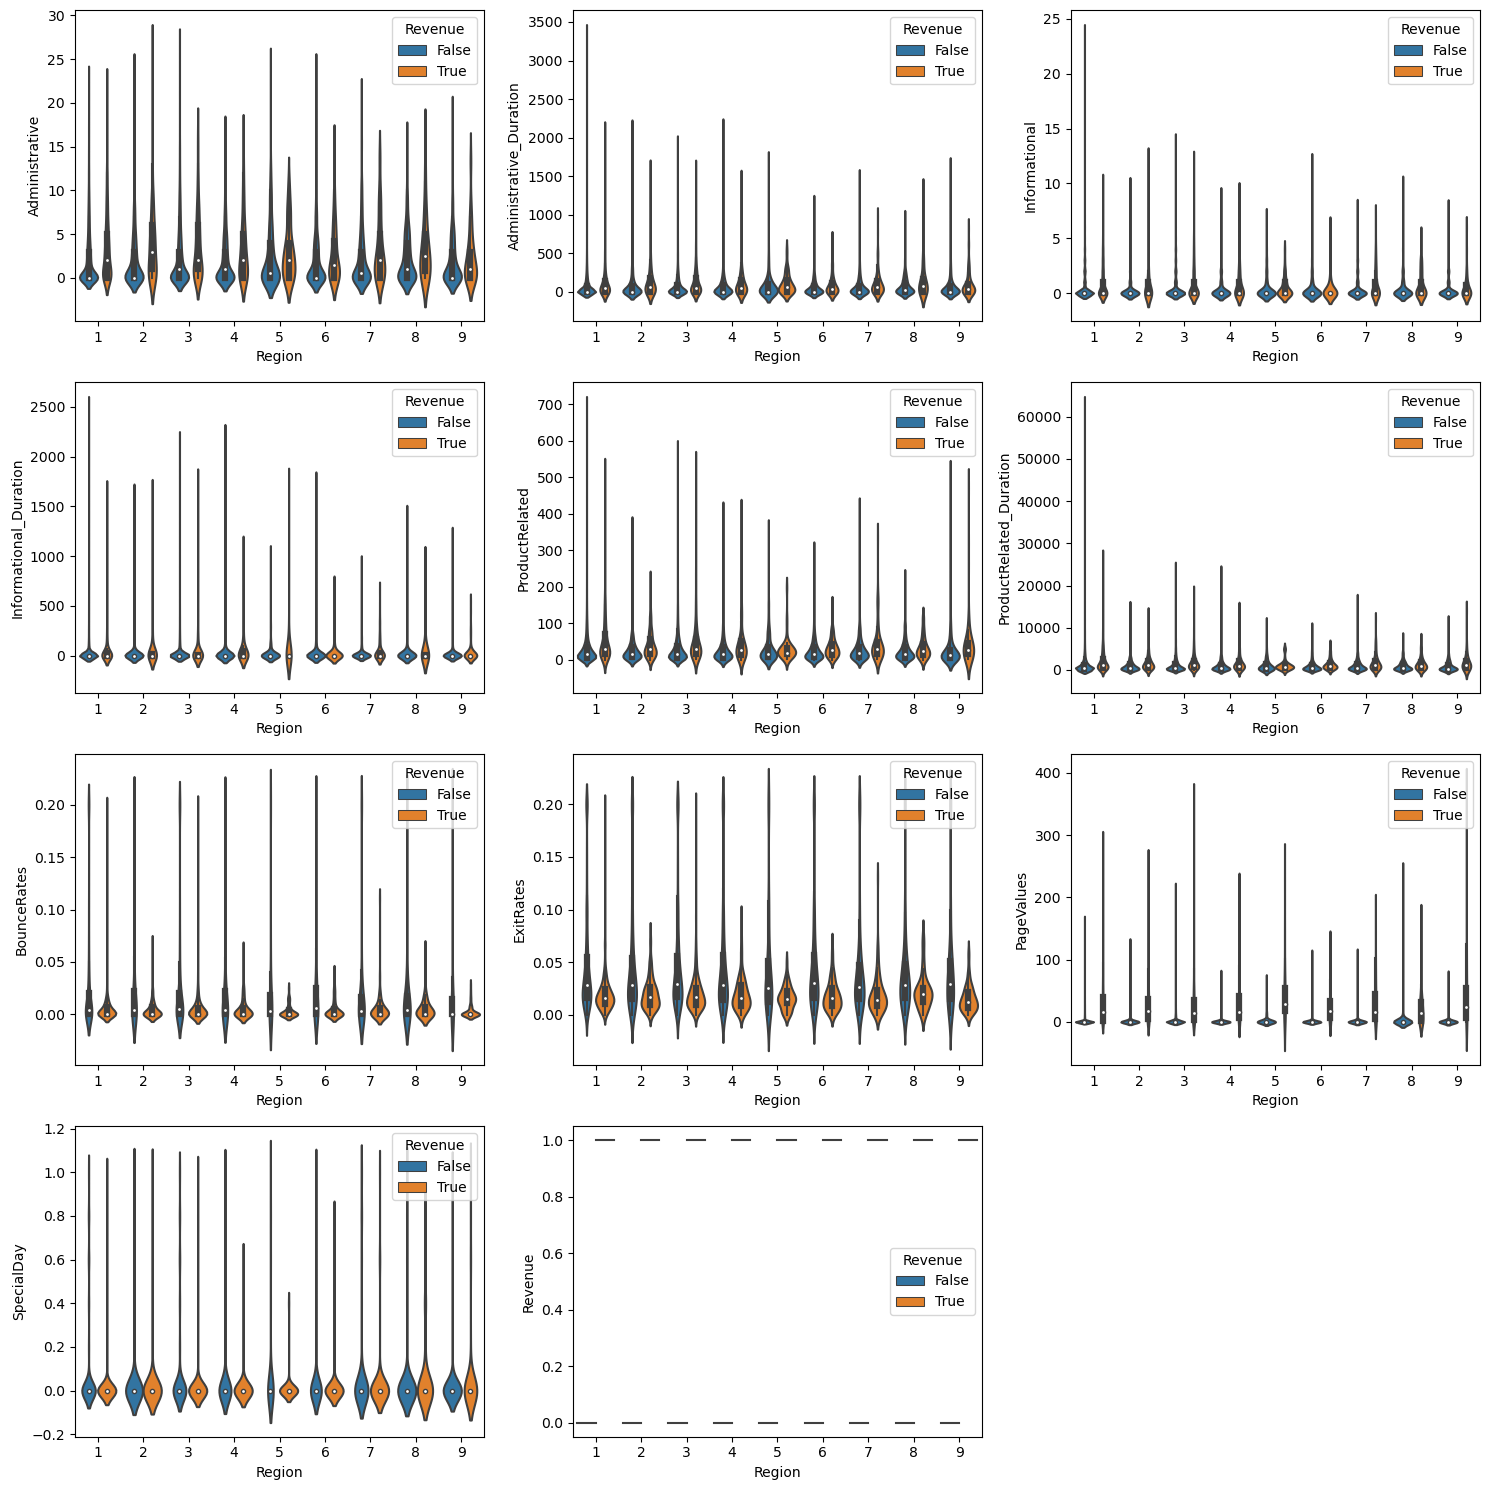

In [30]:
# Hubungan region dengan fitur numerikal
fig = plt.figure(figsize = (15,15))
for i in range(0, len(nums)): #untuk setiap kolom numerik
    ax = fig.add_subplot(4,3,i+1) #kita set posisi catplot/stripplotnya di layout
    sns.violinplot(ax = ax, data = df, x = 'Region', y = nums[i], hue = 'Revenue') #gambar catplot/stripplotnya
    plt.tight_layout()

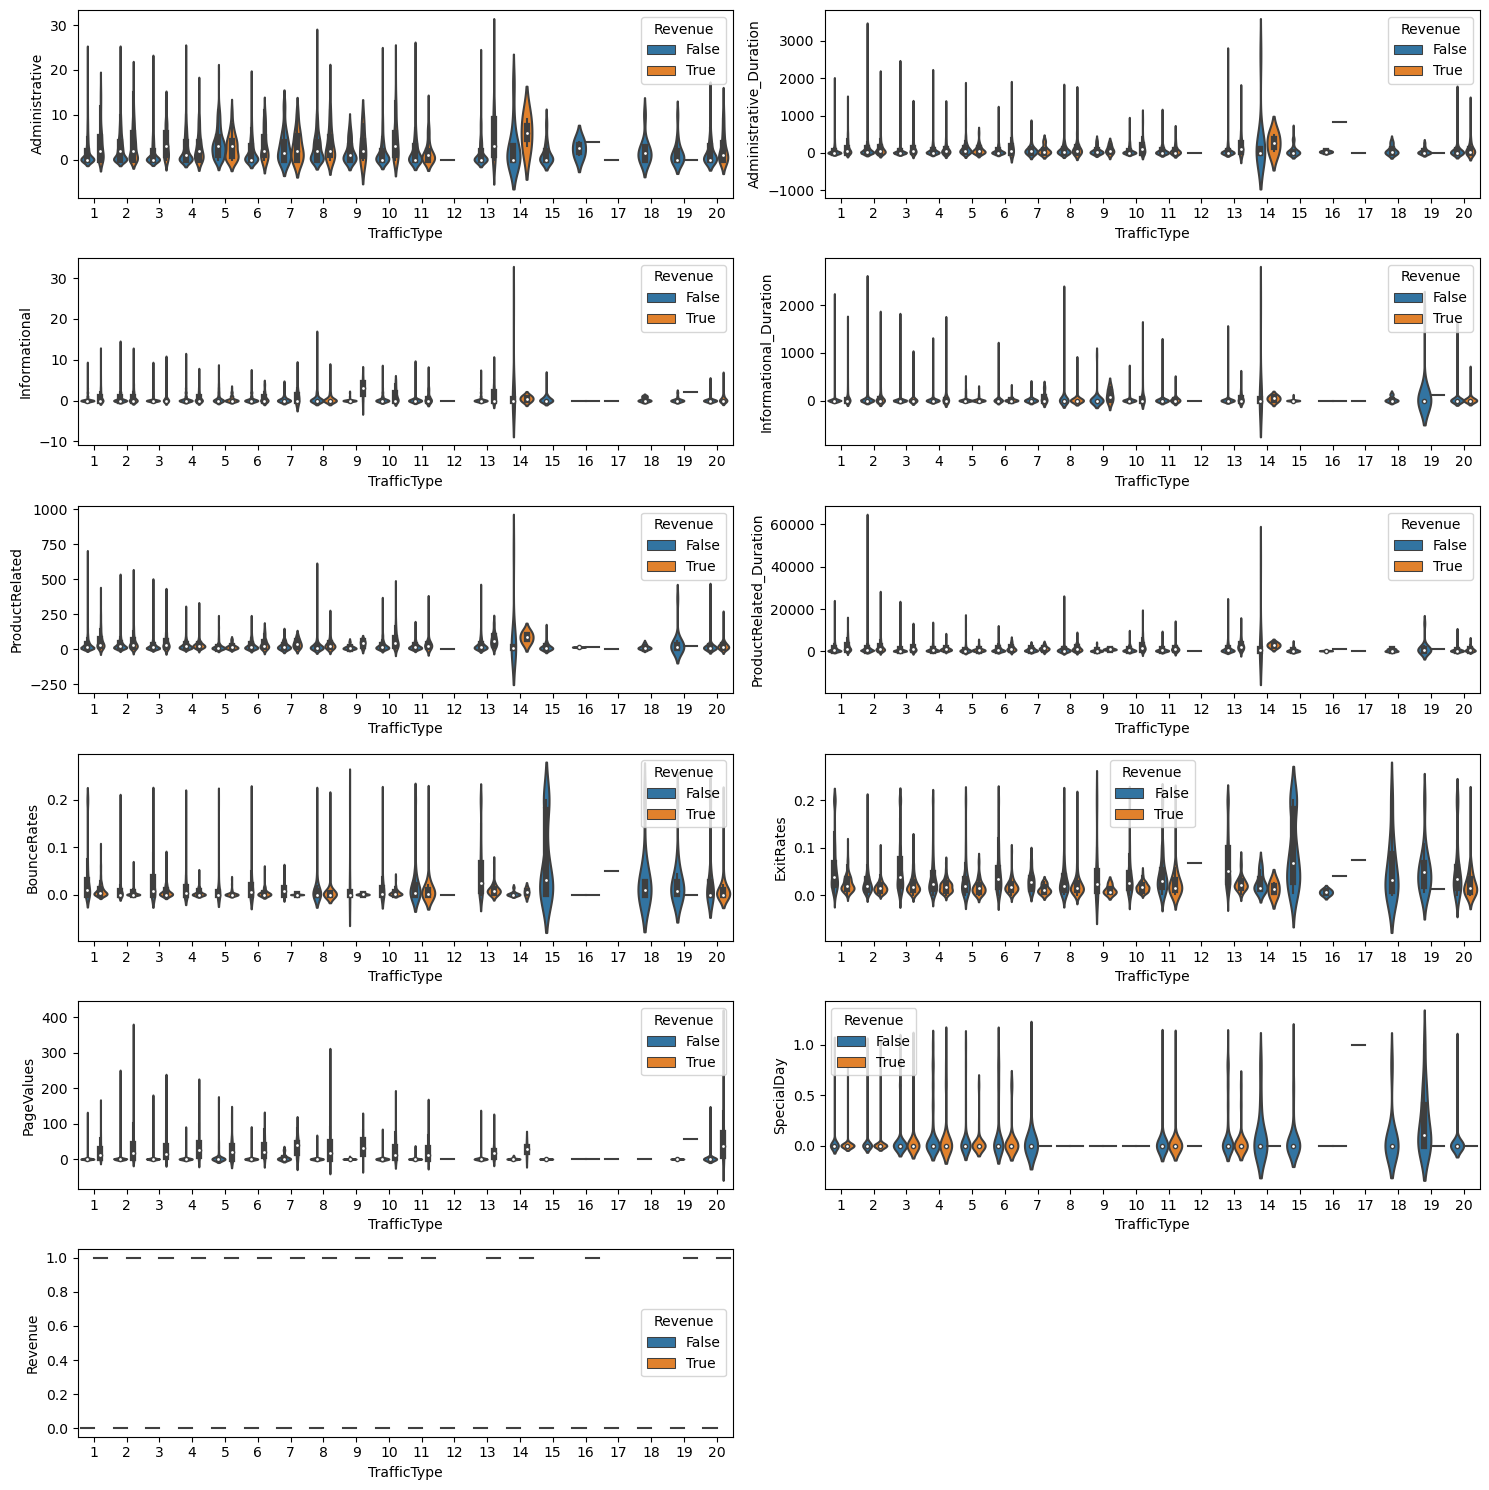

In [31]:
# Hubungan trafic type dengan fitur numerikal
fig = plt.figure(figsize = (15,15))
for i in range(0, len(nums)): #untuk setiap kolom numerik
    ax = fig.add_subplot(6,2,i+1) #kita set posisi catplot/stripplotnya di layout
    sns.violinplot(ax = ax, data = df, x = 'TrafficType', y = nums[i], hue = 'Revenue') #gambar catplot/stripplotnya
    plt.tight_layout()

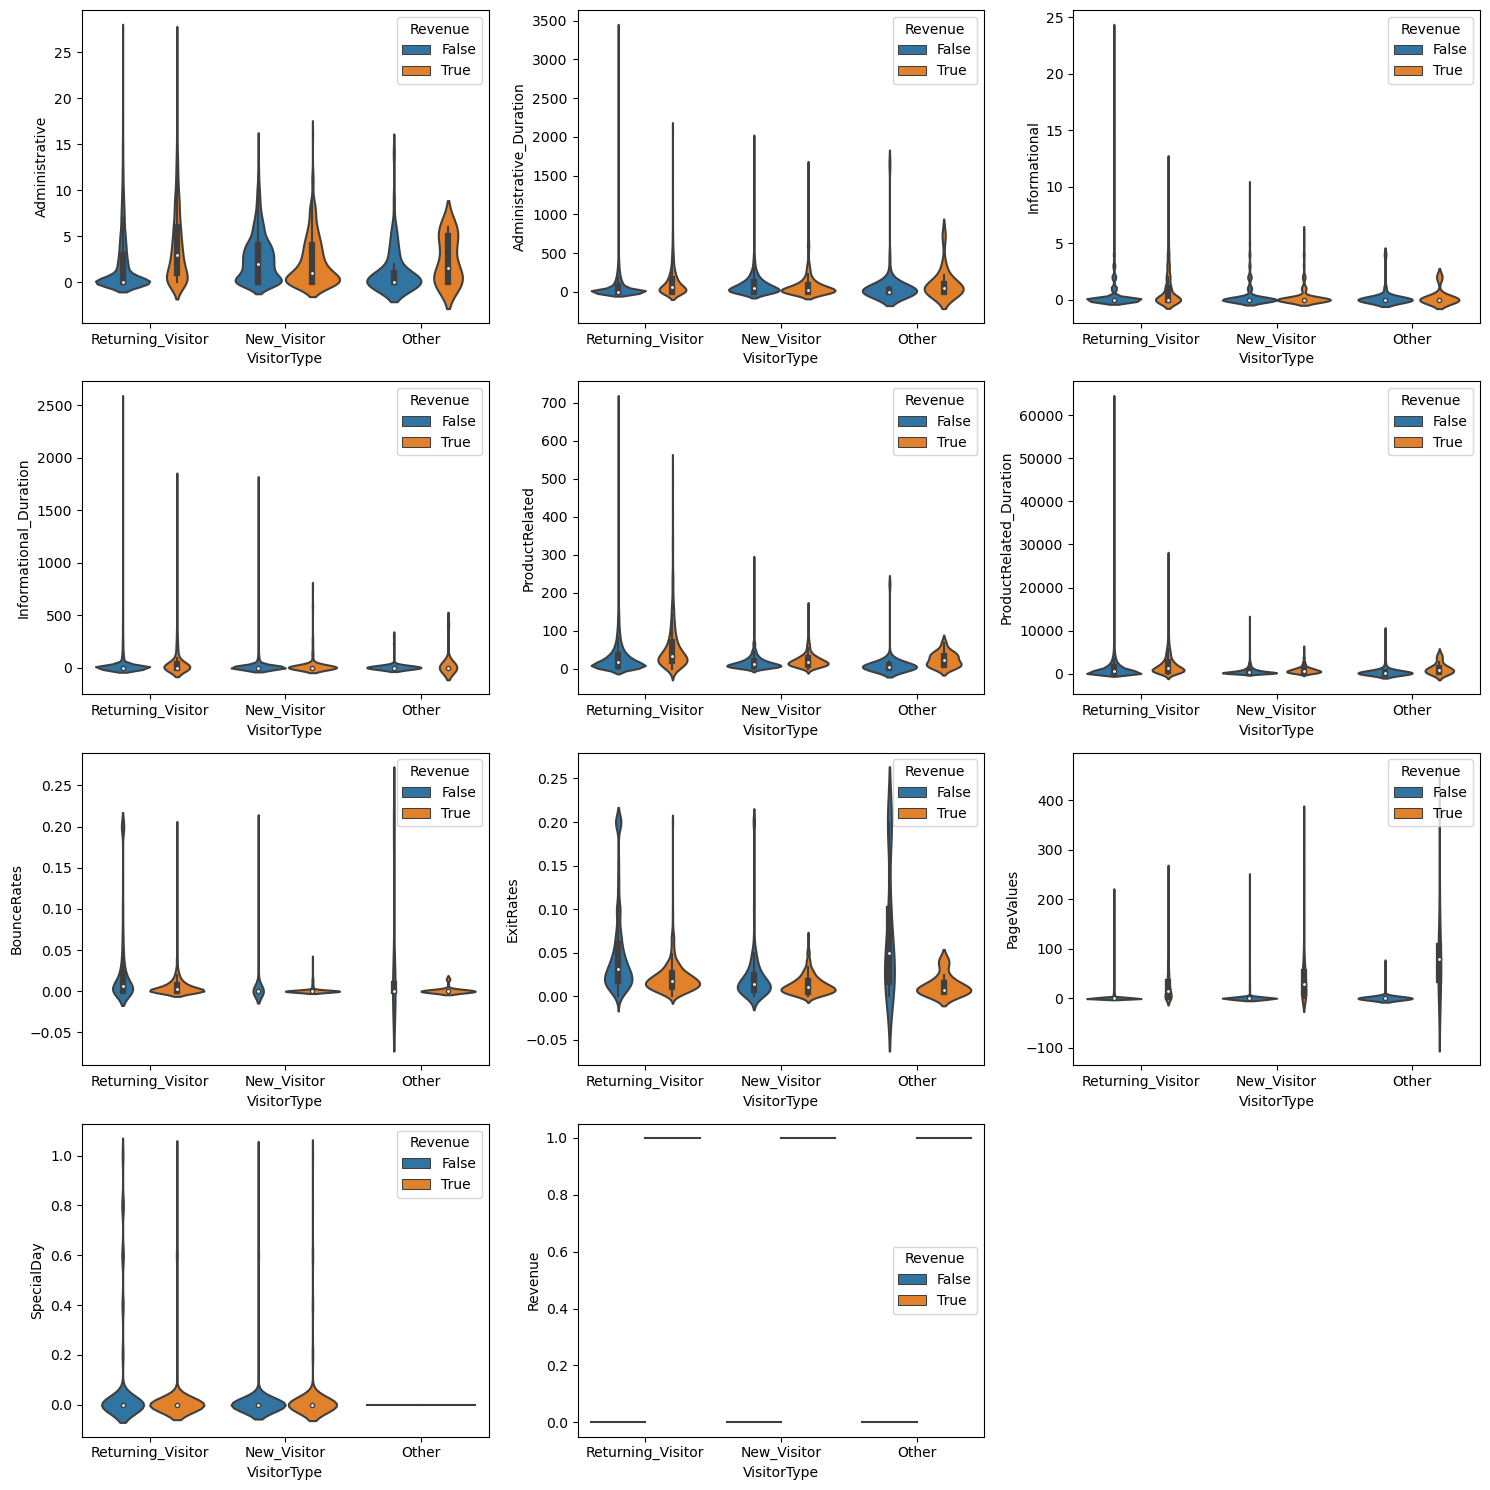

In [32]:
# Hubungan visitor type dengan fitur numerikal
fig = plt.figure(figsize = (15,15))
for i in range(0, len(nums)): #untuk setiap kolom numerik
    ax = fig.add_subplot(4,3,i+1) #kita set posisi catplot/stripplotnya di layout
    sns.violinplot(ax = ax, data = df, x = 'VisitorType', y = nums[i], hue = 'Revenue') #gambar catplot/stripplotnya
    plt.tight_layout()

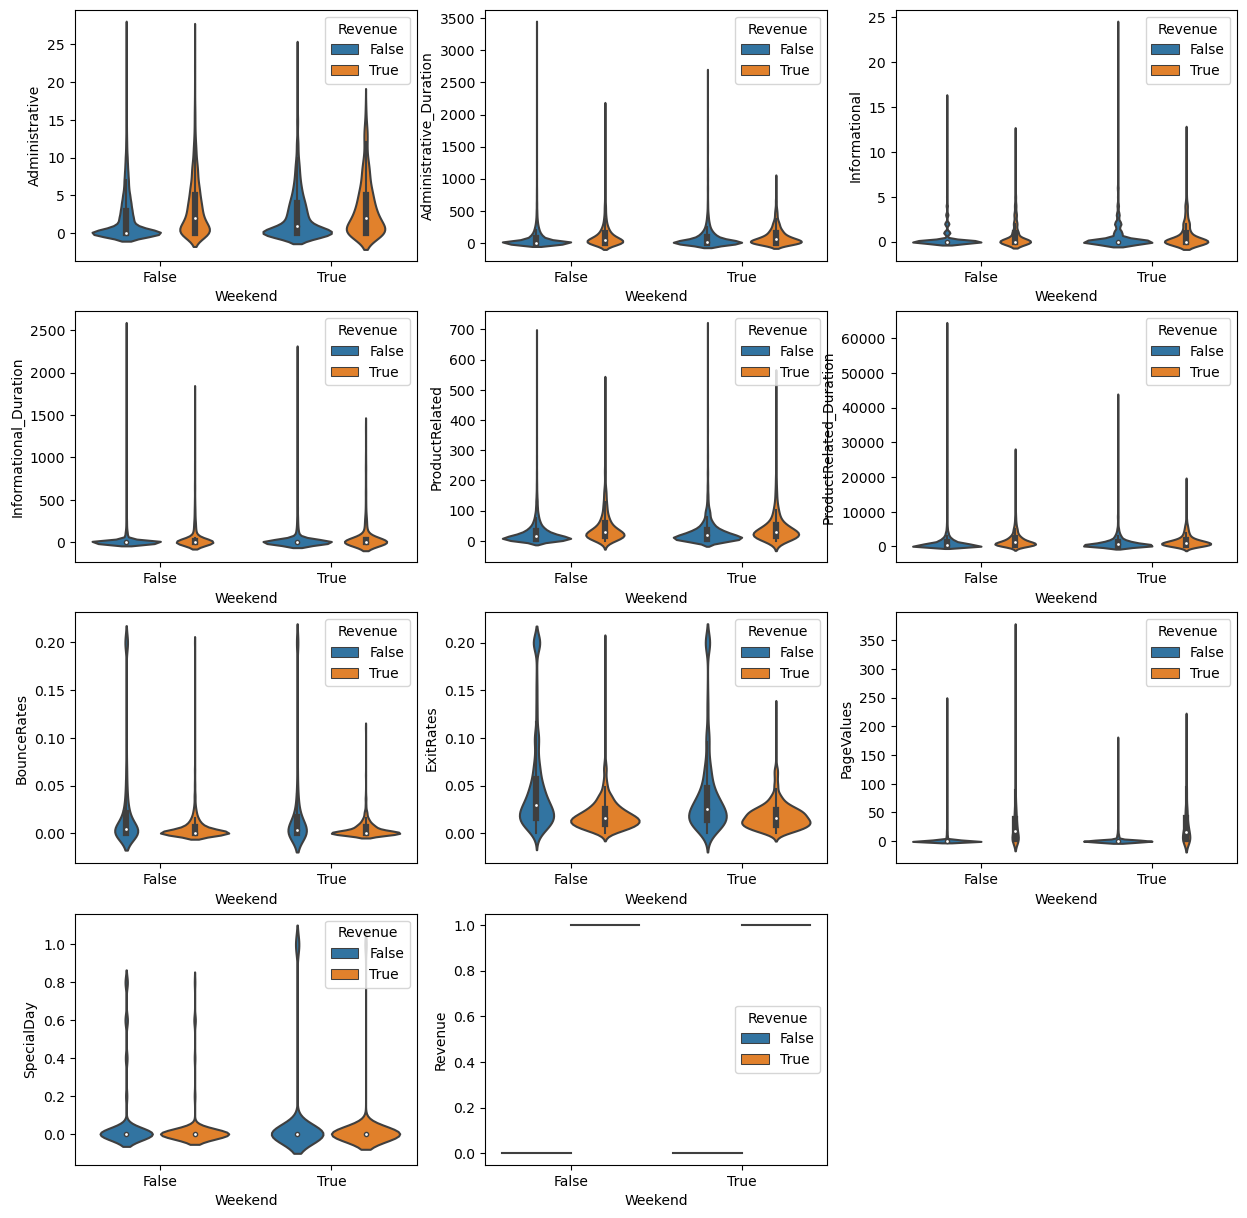

In [33]:
# Hubungan visitor type dengan fitur numerikal
fig = plt.figure(figsize = (15,15))
for i in range(0, len(nums)): #untuk setiap kolom numerik
    ax = fig.add_subplot(4,3,i+1) #kita set posisi catplot/stripplotnya di layout
    sns.violinplot(ax = ax, data = df, x = 'Weekend', y = nums[i], hue = 'Revenue') #gambar catplot/stripplotnya
    plt.tight_layout

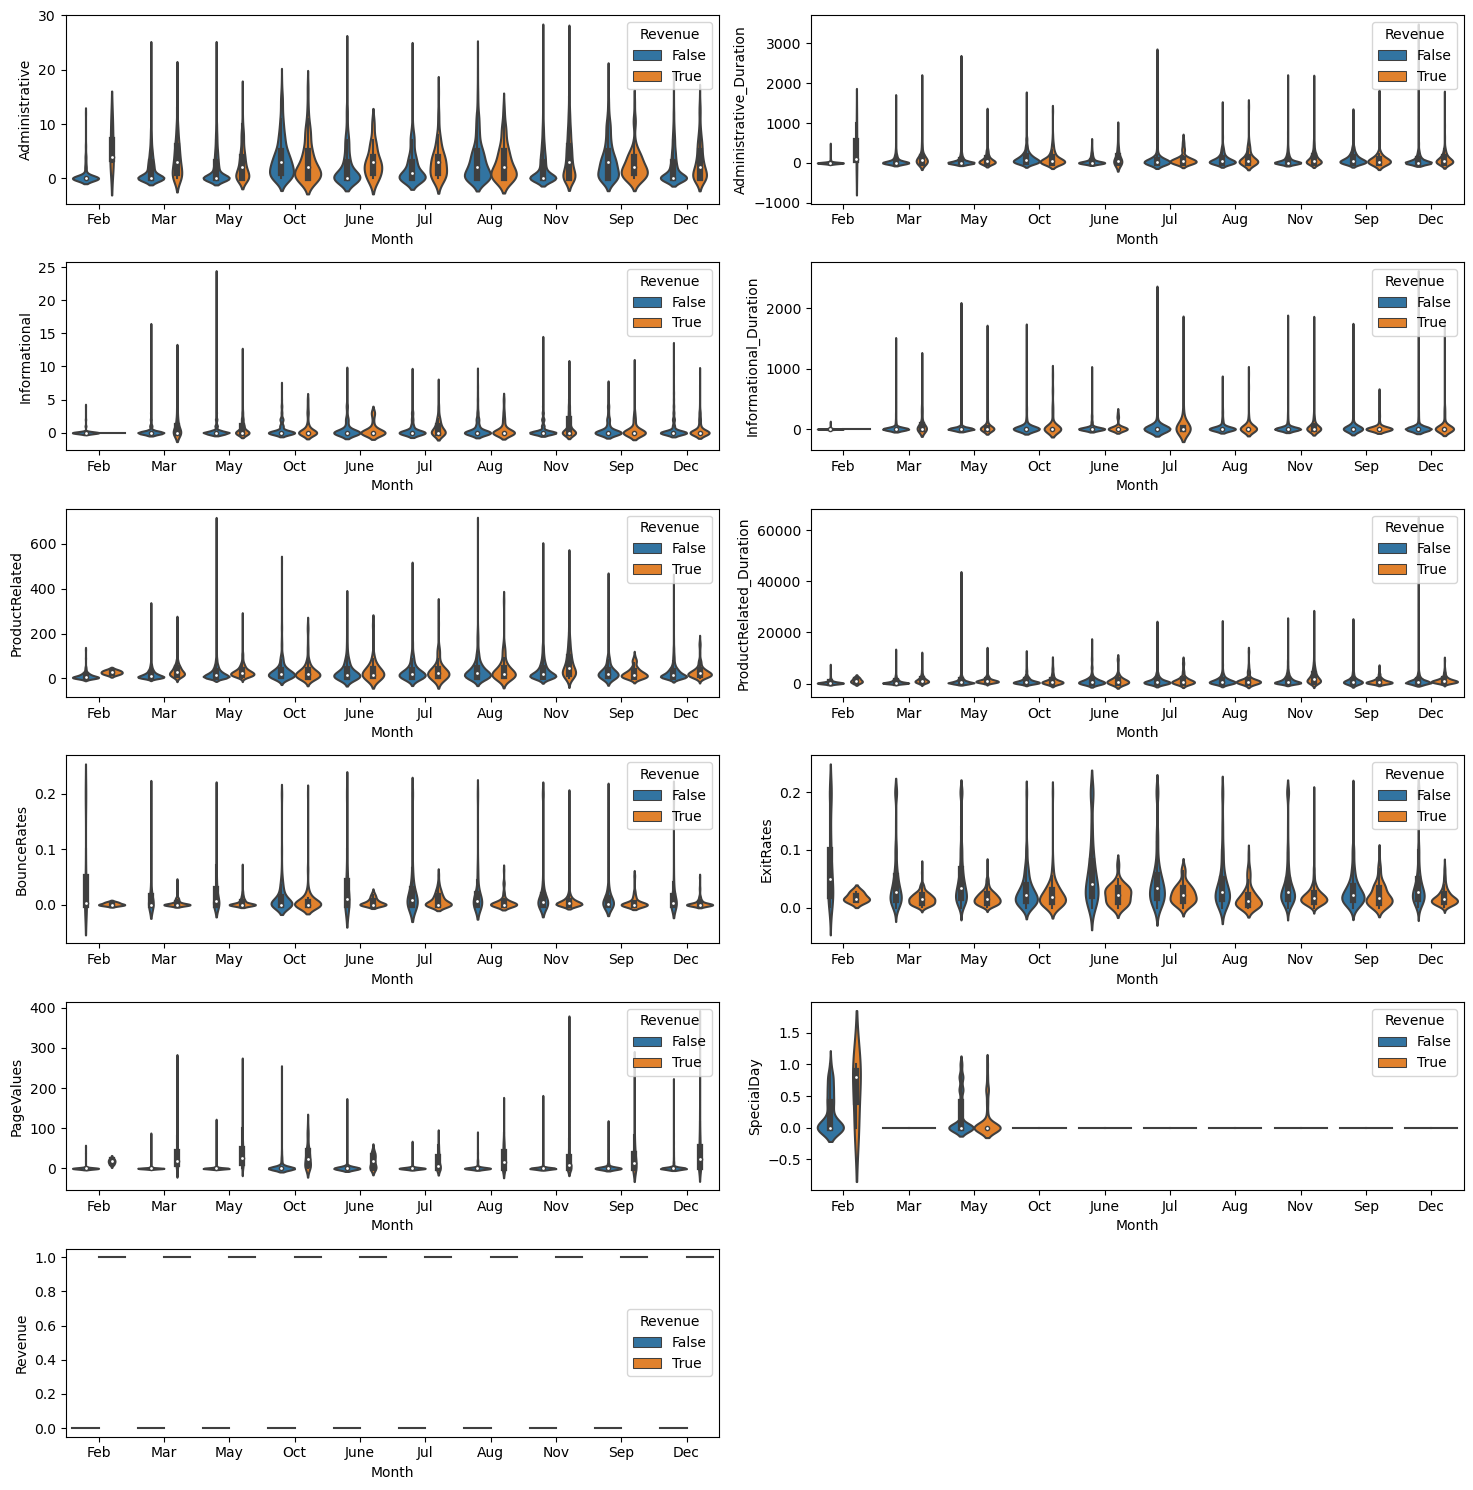

In [34]:
# Hubungan month dengan fitur numerikal
fig = plt.figure(figsize = (15,15))
for i in range(0, len(nums)): #untuk setiap kolom numerik
    ax = fig.add_subplot(6,2,i+1) #kita set posisi catplot/stripplotnya di layout
    sns.violinplot(ax = ax, data = df, x = 'Month', y = nums[i], hue = 'Revenue') #gambar catplot/stripplotnya
    plt.tight_layout()

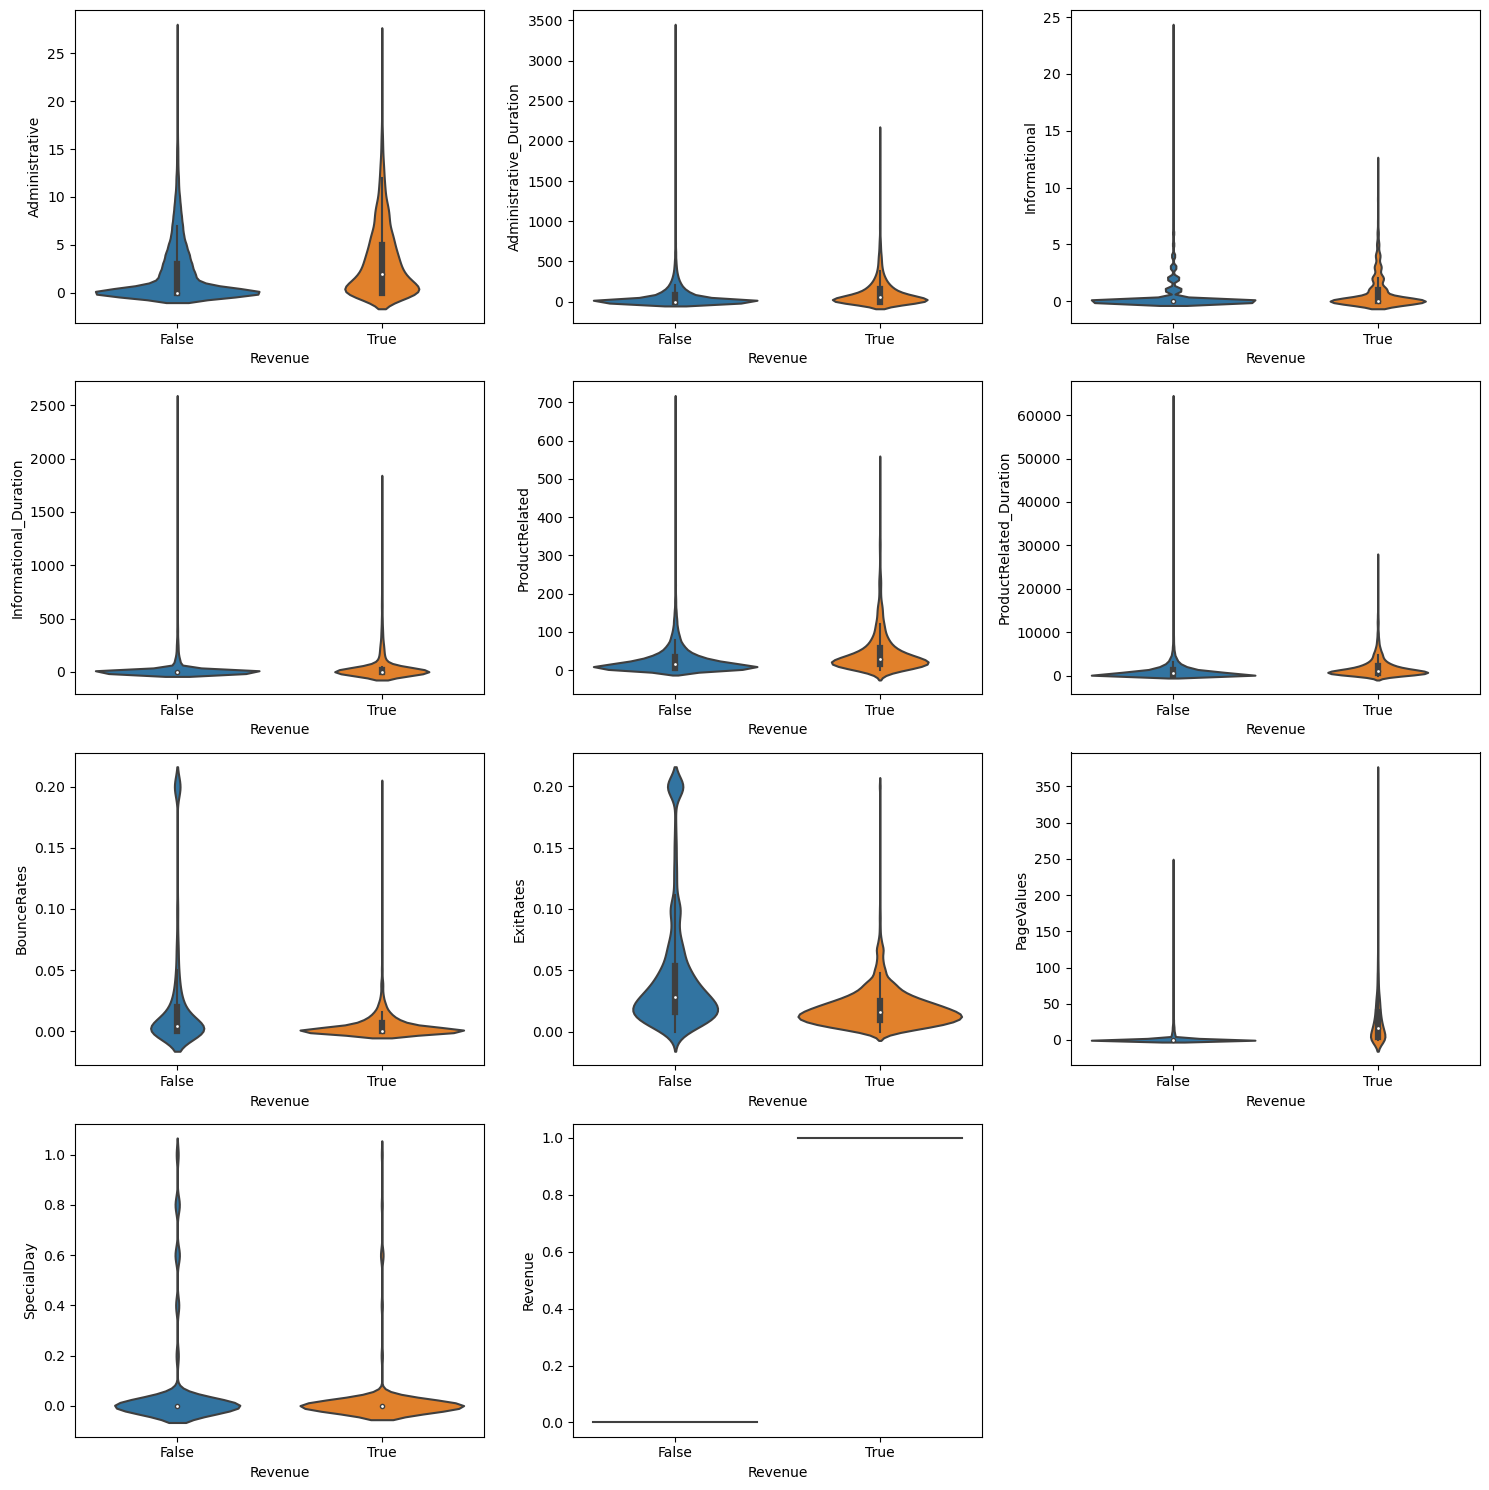

In [35]:
# Hubungan special day dengan fitur numerikal
fig = plt.figure(figsize = (15,15))
for i in range(0, len(nums)): #untuk setiap kolom numerik
    ax = fig.add_subplot(4,3,i+1) #kita set posisi catplot/stripplotnya di layout
    sns.violinplot(ax = ax, data = df, x = 'Revenue', y = nums[i]) #gambar catplot/stripplotnya
    plt.tight_layout()

### **C ) Hubungan Antar Kolom Kategorikal**

In [36]:
tips_categorical = df[cats]
tips_categorical

OperatingSystems  Browser  Region  TrafficType        VisitorType  \
0                     1        1       1            1  Returning_Visitor   
1                     2        2       1            2  Returning_Visitor   
2                     4        1       9            3  Returning_Visitor   
3                     3        2       2            4  Returning_Visitor   
4                     3        3       1            4  Returning_Visitor   
...                 ...      ...     ...          ...                ...   
12325                 4        6       1            1  Returning_Visitor   
12326                 3        2       1            8  Returning_Visitor   
12327                 3        2       1           13  Returning_Visitor   
12328                 2        2       3           11  Returning_Visitor   
12329                 3        2       1            2        New_Visitor   

       Weekend Month  Revenue  
0        False   Feb    False  
1        False   Feb    False  
2        False   Feb    False  
3        False   Feb    False  
4         True   Feb    False  
...        ...   ...      ...  
12325     True   Dec    False  
12326     True   Nov    False  
12327     True   Nov    False  
12328    False   Nov    False  
12329     True   Nov    False  

[12330 rows x 8 columns]

In [37]:
def cramers_V(var1, var2):
    crosstab = np.array(pd.crosstab(var1, var2, rownames = None, colnames = None))
    stat = chi2_contingency(crosstab)[0]
    obs = np.sum(crosstab)
    mini = min(crosstab.shape)-1
    return (np.sqrt(stat/(obs*mini)))

In [38]:
from scipy.stats import chi2_contingency
rows = []
for var1 in tips_categorical:
    col = []
    for var2 in tips_categorical:
        cramers = cramers_V(tips_categorical[var1], tips_categorical[var2])
        col.append(round(cramers,2))
    rows.append(col)

cramers_result = np.array(rows)
tabel_corelation_categorical = pd.DataFrame(cramers_result, columns = tips_categorical.columns, index = tips_categorical.columns)

In [39]:
tabel_corelation_categorical

OperatingSystems  Browser  Region  TrafficType  VisitorType  \
OperatingSystems              1.00     0.60    0.12         0.20         0.47   
Browser                       0.60     1.00    0.13         0.19         0.51   
Region                        0.12     0.13    1.00         0.09         0.18   
TrafficType                   0.20     0.19    0.09         1.00         0.39   
VisitorType                   0.47     0.51    0.18         0.39         1.00   
Weekend                       0.12     0.09    0.03         0.15         0.06   
Month                         0.06     0.07    0.05         0.20         0.14   
Revenue                       0.08     0.05    0.03         0.17         0.10   

                  Weekend  Month  Revenue  
OperatingSystems     0.12   0.06     0.08  
Browser              0.09   0.07     0.05  
Region               0.03   0.05     0.03  
TrafficType          0.15   0.20     0.17  
VisitorType          0.06   0.14     0.10  
Weekend              1.00   0.06     0.03  
Month                0.06   1.00     0.18  
Revenue              0.03   0.18     1.00

<AxesSubplot: >

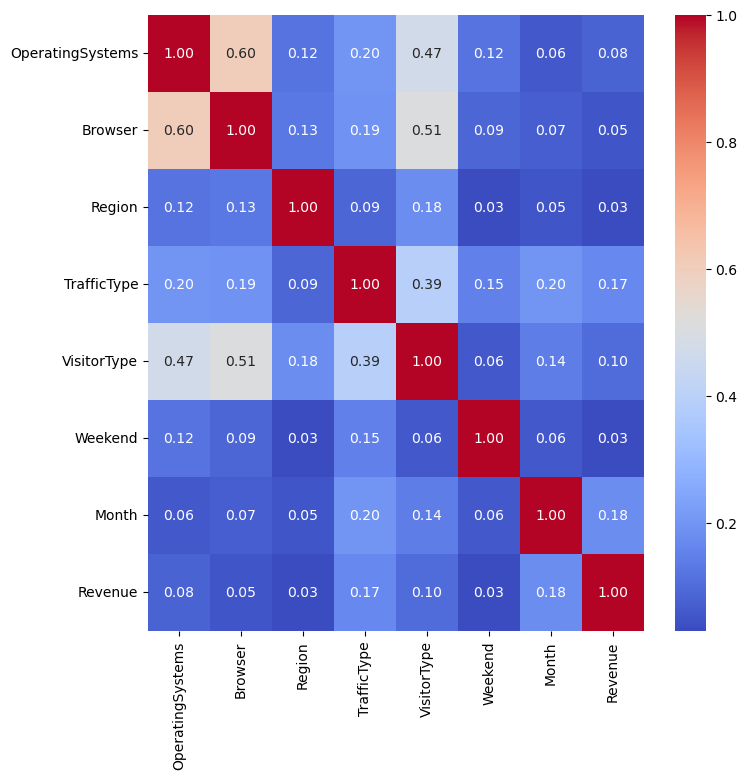

In [40]:
plt.figure(figsize = (8,8))
sns.heatmap(tabel_corelation_categorical, cmap = 'coolwarm', annot = True, fmt = '.2f')

- **Browser** dan **OperatingSystems** memiliki korelasi yang cukup **tinggi**.
- **Browser** dan **VisitorType** juga memiliki korelasi yang **tinggi**.
- Nilai korelasi **antar kolom** dengan kolom **Revenue** cenderung **rendah**.

# **4. Business Insight**
---

### **A ) VisitorType With Revenue**

Mengetahuai pola dari tipe pelanggan yang menghasilkan revenue dan tidak.

([<matplotlib.patches.Wedge at 0x2206e644df0>,
 [Text(-1.0788208079242065, 0.525495636889368, 'Returning_Visitor'),
  Text(1.0671878754415025, -0.5487349437667082, 'New_Visitor'),
  Text(1.1997185885832733, -0.025986692897690122, 'Other')],
 [Text(-0.6293121379557871, 0.306539121518798, '85.57'),
  Text(0.6225262606742097, -0.32009538386391306, '13.74'),
  Text(0.6998358433402426, -0.015158904190319237, '0.69')])

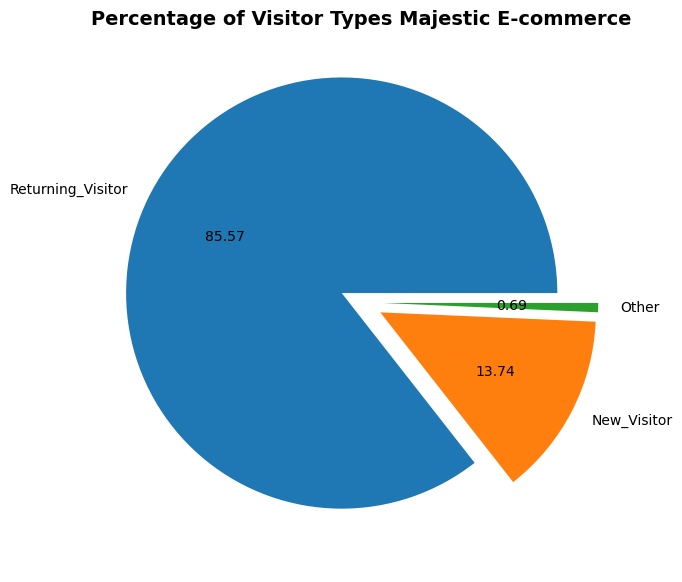

In [41]:
# Persentase tipe pelanggan yang mengunjungi web

plt.figure(figsize=(15,7))
plt.title('Percentage of Visitor Types Majestic E-commerce',fontsize=14,fontweight='bold')
plt.pie(x=df['VisitorType'].value_counts(),
        labels = ['Returning_Visitor','New_Visitor','Other'],
        autopct='%.2f',
        explode = (0.1,0.1,0.1))


In [42]:
# membual kalkulasi vitor type daan revenue dengan pivot table
df_cal = df.copy()
val =['Other', 'New_Visitor', 'Returning_Visitor']
df_cal['VisitorType'] = pd.Categorical(df_cal['VisitorType'], categories = val)

v_rev = df_cal.groupby(['VisitorType', 'Revenue'])['Revenue'].count()
v_rev = v_rev.reset_index(name='count')
v_rev['percentage'] =  (100 * v_rev['count'] / v_rev.groupby('VisitorType')['count'].transform('sum')).round(2)

pvt = v_rev.pivot_table(index='VisitorType', columns='Revenue', values=['count', 'percentage'])
pvt

count       percentage       
Revenue           False  True      False   True
VisitorType                                    
Other                69    16      81.18  18.82
New_Visitor        1272   422      75.09  24.91
Returning_Visitor  9081  1470      86.07  13.93

Text(2900, 0.9, '25%')

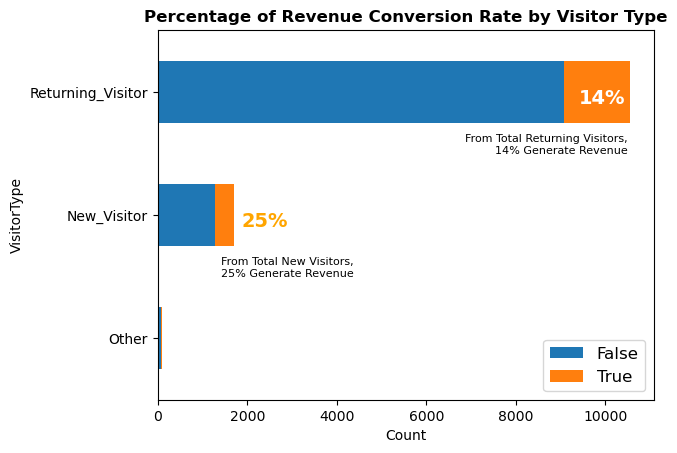

In [43]:
pvt_count = v_rev.pivot_table(index='VisitorType', columns='Revenue', values='count')

ax = pvt_count.plot(kind='barh', stacked=True)
plt.title('Percentage of Revenue Conversion Rate by Visitor Type', fontweight='bold')
plt.xticks(rotation=360)
plt.xlabel('Count')
plt.legend(loc='lower right', fontsize=12)

plt.annotate(xy=(10500,1.5), xytext=(10500, 1.5), text='From Total Returning Visitors,\n14% Generate Revenue', fontsize=8, ha='right')
plt.annotate(xy=(10450,1.9), xytext=(10450, 1.9), text='14%', fontsize=14, ha='right', fontweight='bold', color='white')

plt.annotate(xy=(2900,0.5), xytext=(2900, 0.5), text='From Total New Visitors,\n25% Generate Revenue', fontsize=8, ha='center')
plt.annotate(xy=(2900,0.9), xytext=(2900, 0.9), text='25%', fontsize=14, ha='right', fontweight='bold', color='orange')

Dapat dilihat bahwa pada setahun terakhir jumlah pengunjung dari new visitor memiliki perbandingan yang cukup rendah di banding dengan returning visitor, hal ini menunjukkan bahwa E-commerce ini sudah berhasil menjaga jumlah returning visitor walaupun jumlah revenue yang dihasilkan masih terbilang sedikit <br>

**Rekomendasi bisnis :** 
- Memberikan promo, voucher, atau kode referral pada new visitor untuk menambah pengguna baru pada e-commerce.
- Perlu adanya analisis lebih lanjut untuk rekomendasi apa yang sesuai agar meningkatkan revenue dari returning visitor.

### **B ) Visitor per Month With Revenue**

In [44]:
df_m = df.copy()
val =['Feb', 'Mar', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_m['Month'] = pd.Categorical(df_cal['Month'], categories = val)

df_m = df_m.groupby(['Month', 'Revenue'])['Month'].count()
df_m = df_m.reset_index(name='count')
df_m['percentage'] =  (100 * df_m['count'] / df_m.groupby('Month')['count'].transform('sum')).round(2)

pvt = df_m.pivot_table(index='Month', columns='Revenue', values=['count', 'percentage'])
pvt

count      percentage       
Revenue False True      False   True
Month                               
Feb       181    3      98.37   1.63
Mar      1715  192      89.93  10.07
May      2999  365      89.15  10.85
June      259   29      89.93  10.07
Jul       366   66      84.72  15.28
Aug       357   76      82.45  17.55
Sep       362   86      80.80  19.20
Oct       434  115      79.05  20.95
Nov      2238  760      74.65  25.35
Dec      1511  216      87.49  12.51

Text(7.97, 2550, 'November has the highest total visitors with \nthe highest monthly revenue conversion rate, \nreaching 25%.')

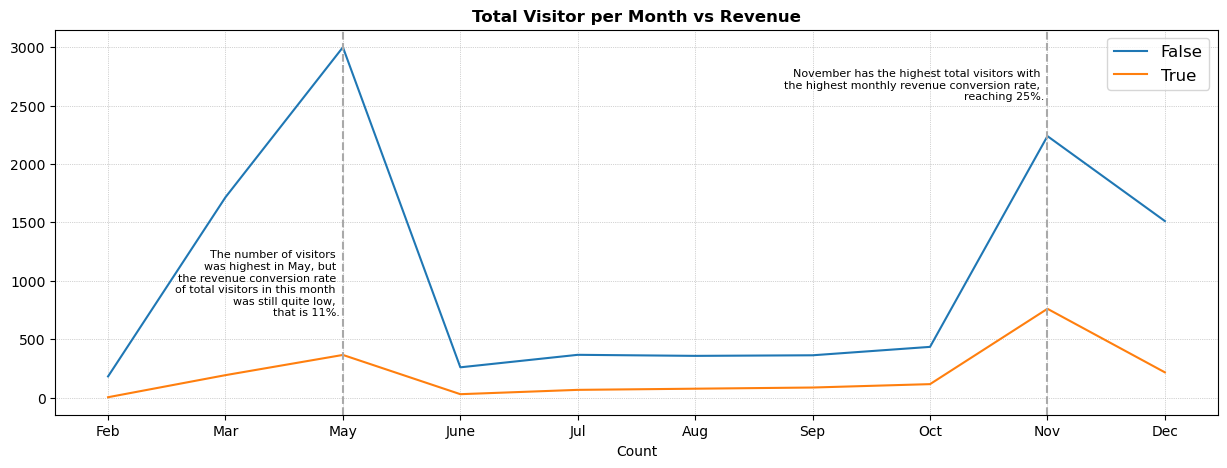

In [45]:
pvt_count = df_m.pivot_table(index='Month', columns='Revenue', values='count')

ax = pvt_count.plot(kind='line', figsize=(15,5))
plt.title('Total Visitor per Month vs Revenue', fontweight='bold')

# plt.xticks(rotation=360)
plt.xlabel('Count')
plt.legend(loc='lower right', fontsize=12)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.legend(loc='upper right', fontsize=12)

ax.set_xticks(np.arange(len(pvt_count))) #Show ticks for each country
ax.set_xticklabels(val) 

plt.axvline(x=2, color='darkgrey', ls='--', lw=1.5)
plt.axvline(x=8, color='darkgrey', ls='--', lw=1.5)

plt.text(1.97, 700, s='The number of visitors \nwas highest in May, but \nthe revenue conversion rate \nof total visitors in this month \nwas still quite low, \nthat is 11%.', 
         fontsize=8, ha = 'right')
plt.text(7.97, 2550, s='November has the highest total visitors with \nthe highest monthly revenue conversion rate, \nreaching 25%.', 
         fontsize=8, ha = 'right')

Dapat dilihat bahwa trafik kunjungan pelanggan setiap bulan memiliki jumlah yang paling tinggi pada bulan Mei dan di susul pada bulan November. Namun pada bulan Mei tingginya trafik tidak diikusi dengan tingginya angka Revenue Conversion Rate yang hanya menghasilkan 11%. Sedangkan pada bulan November merupakan bulan yang memiliki cukup banyak pengunjung dengan nilai Revenue Conversion Rate bulanan yang paling tinggi, yaitu mencapai 25%.<br>

**Rekomendasi Bisnis :**
- Insight ini dapat berguna untuk tim marketing untuk mengadakan atau memaksimalkan campaign pada bulan-bulan yang memiliki trafik yang tinggi dengan Revenue Conversion Rate yang tinggi juga.
- Pada bulan Juni - Oktober memiliki angka Revenue Conversion Rate berkisar 15 - 20%, termasuk sedang pada tahun tersebut. Perlu adanya action (promosi dll) untuk meningkat trafik jumlah kunjungan website sehingga diharapkan revenue juga akan meningkat.

### **C ) Region With Revenue**

In [46]:
reg = df.copy()
reg = reg.groupby(['Region', 'Revenue'])['Region'].count()
reg = reg.reset_index(name='count')
reg['percentage'] =  (100 * reg['count'] / reg.groupby('Region')['count'].transform('sum')).round(2)

pvt = reg.pivot_table(index='Region', columns='Revenue', values=['count', 'percentage'])
pvt

count      percentage       
Revenue False True      False   True
Region                              
1        4009  771      83.87  16.13
2         948  188      83.45  16.55
3        2054  349      85.48  14.52
4        1007  175      85.19  14.81
5         266   52      83.65  16.35
6         693  112      86.09  13.91
7         642  119      84.36  15.64
8         378   56      87.10  12.90
9         425   86      83.17  16.83

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9')])

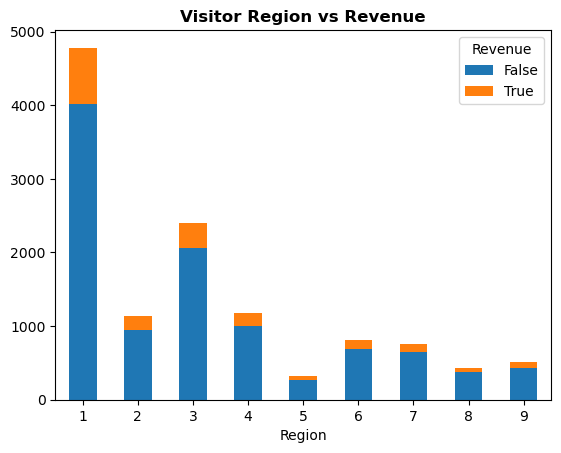

In [47]:
pvt_count = reg.pivot_table(index='Region', columns='Revenue', values='count')

ax = pvt_count.plot(kind='bar', stacked=True)
plt.title('Visitor Region vs Revenue', fontweight='bold')
plt.xticks(rotation=360)

Kunjungan pelanggan didominasi pada region "1" dengan Revenue Convesion Rate yang cukup tinggi.<br>

**Rekomendasi Bisnis:** 
- Meningkatkan promosi E-commerce pada region yang lain atau memekasimalkan promo di region 1 agar revenue meningkat.

### **D ) Weekend Vs Revenue**

In [48]:
w = df.copy()
w = w.groupby(['Weekend', 'Revenue'])['Region'].count()
w = w.reset_index(name='count')
w['percentage'] =  (100 * w['count'] / w.groupby('Weekend')['count'].transform('sum')).round(2)

pvt = w.pivot_table(index='Weekend', columns='Revenue', values=['count', 'percentage'])
pvt

count       percentage       
Revenue False  True      False   True
Weekend                              
False    8053  1409      85.11  14.89
True     2369   499      82.60  17.40

(array([0, 1]), [Text(0, 0, 'False'), Text(1, 0, 'True')])

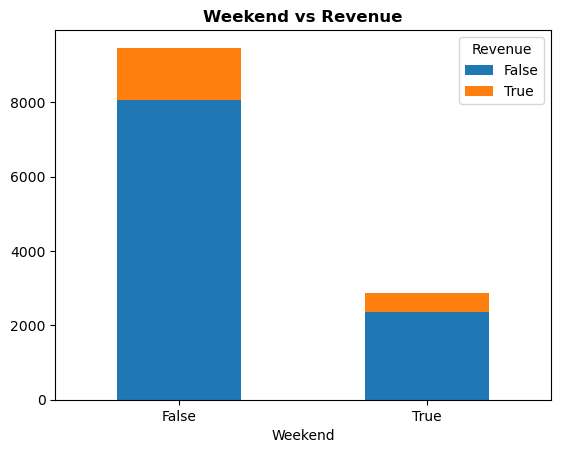

In [49]:
pvt_count = w.pivot_table(index='Weekend', columns='Revenue', values='count')

ax = pvt_count.plot(kind='bar', stacked=True)
plt.title('Weekend vs Revenue', fontweight='bold')
plt.xticks(rotation=360)

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120')])

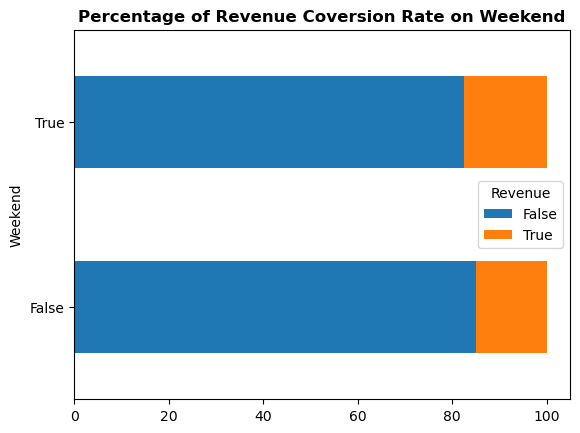

In [50]:
pvt_count = w.pivot_table(index='Weekend', columns='Revenue', values='percentage')

ax = pvt_count.plot(kind='barh', stacked=True)
plt.title('Percentage of Revenue Coversion Rate on Weekend', fontweight='bold')
plt.xticks(rotation=360)

Pada dasarnya Renue Conversion Rate Weekend dan Weekday tidak terlalu berbeda signifikan. Namun Weekday memiliki nilai yang lebih tinggi. Namun hal ini bisa terjadi dikarenakan memang jumlah hari di Weekday lebih banyak daripada Weekend atau memang pengunjung memang lebih sering mengunjungi website di hari-hari weekday.<br>

**Rekomendasi Bisnis:**
- Melakukan campaign atau promosi pada prime time atau waktu-waktu yang memungkinkan user untuk melakukan visitasi pada E-commerce.